<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Les-librairies-nécessaires" data-toc-modified-id="Les-librairies-nécessaires-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Les librairies nécessaires</a></span></li><li><span><a href="#La-connexion-à-la-base-de-données-PostgreSQL" data-toc-modified-id="La-connexion-à-la-base-de-données-PostgreSQL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>La connexion à la base de données PostgreSQL</a></span></li><li><span><a href="#Création-de-la-table-COMMANDES01" data-toc-modified-id="Création-de-la-table-COMMANDES01-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Création de la table COMMANDES01</a></span><ul class="toc-item"><li><span><a href="#Clé-primaire-pour-la-table-COMMANDES01" data-toc-modified-id="Clé-primaire-pour-la-table-COMMANDES01-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Clé primaire pour la table COMMANDES01</a></span></li><li><span><a href="#Clé-étrangère-référencent-la-colonne-NO_EMPLOYE-de-la-table-EMPLOYES" data-toc-modified-id="Clé-étrangère-référencent-la-colonne-NO_EMPLOYE-de-la-table-EMPLOYES-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Clé étrangère référencent la colonne NO_EMPLOYE de la table EMPLOYES</a></span></li></ul></li></ul></div>

# Les librairies nécessaires

In [1]:
import pandas as pd, numpy as np, seaborn as sns
import warnings 
import os
from matplotlib import pyplot as plt

from datetime import datetime
warnings.filterwarnings(action="ignore")

%matplotlib inline

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=3)

In [2]:
# Changement de répertoire 
os.chdir("C:/Users/etien/Documents/CCI/_HUB/cours/2024-2025/big_data/_git/donnees")

In [3]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

# Lecture du fichier de données

In [4]:
donnees = pd.read_csv("../donnees/export_sql.csv", sep=";")
donnees.PORT = donnees.PORT.apply(lambda x: str(x).replace(',','.')).astype('float32')
donnees.CA   = donnees.CA.apply(lambda x: str(x).replace(',','.')).astype('float32')
donnees.columns = list(map(lambda x: x.lower(),donnees.columns))
donnees.head()

,pays,province,annee,mois,fournisseur,categorie,quantites,port,ca
0,Espagne,Girona,2019,10,Exotic Liquids,Boissons,350,313.600006,18371.162109
1,Espagne,Girona,2019,10,Heli Süßwaren GmbH Co. KG,Desserts,296,306.399994,14257.975586
2,Espagne,Girona,2019,10,Lyngbysild,Poissons et fruits de mer,346,306.399994,18075.441406
3,Australie,Queensland,2019,11,Formaggi Fortini s.r.l.,Boissons,306,237.100006,12905.174805
4,Australie,New South Wales,2019,11,Bigfoot Breweries,Boissons,857,660.200012,33213.148438


In [5]:
donnees.to_parquet('../donnees/export_sql.parquet')

In [6]:
donnees=pd.read_parquet('../donnees/export_sql.parquet')

In [7]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pays         75120 non-null  object 
 1   province     75120 non-null  object 
 2   annee        75120 non-null  int64  
 3   mois         75120 non-null  int64  
 4   fournisseur  75120 non-null  object 
 5   categorie    75120 non-null  object 
 6   quantites    75120 non-null  int64  
 7   port         75120 non-null  float32
 8   ca           75120 non-null  float32
dtypes: float32(2), int64(3), object(4)
memory usage: 4.6+ MB


In [8]:
donnees.describe()

,annee,mois,quantites,port,ca
count,75120.000000,75120.000000,75120.000000,75120.000000,75120.000000
mean,2017.945261,6.539776,295.768118,202.553268,17483.455078
std,0.791474,3.432156,264.056237,172.021469,16382.692383
min,2017.000000,1.000000,20.000000,50.000000,610.768005
25%,2017.000000,4.000000,125.000000,85.000000,6812.140747
50%,2018.000000,7.000000,211.000000,153.199997,12445.887695
75%,2019.000000,10.000000,382.000000,255.600006,22638.795898
max,2019.000000,12.000000,3990.000000,2572.800049,240960.593750


# Les distributions des variables quantitatives

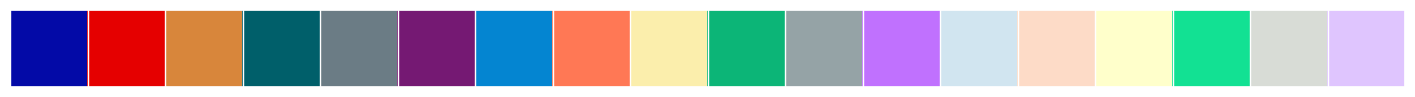

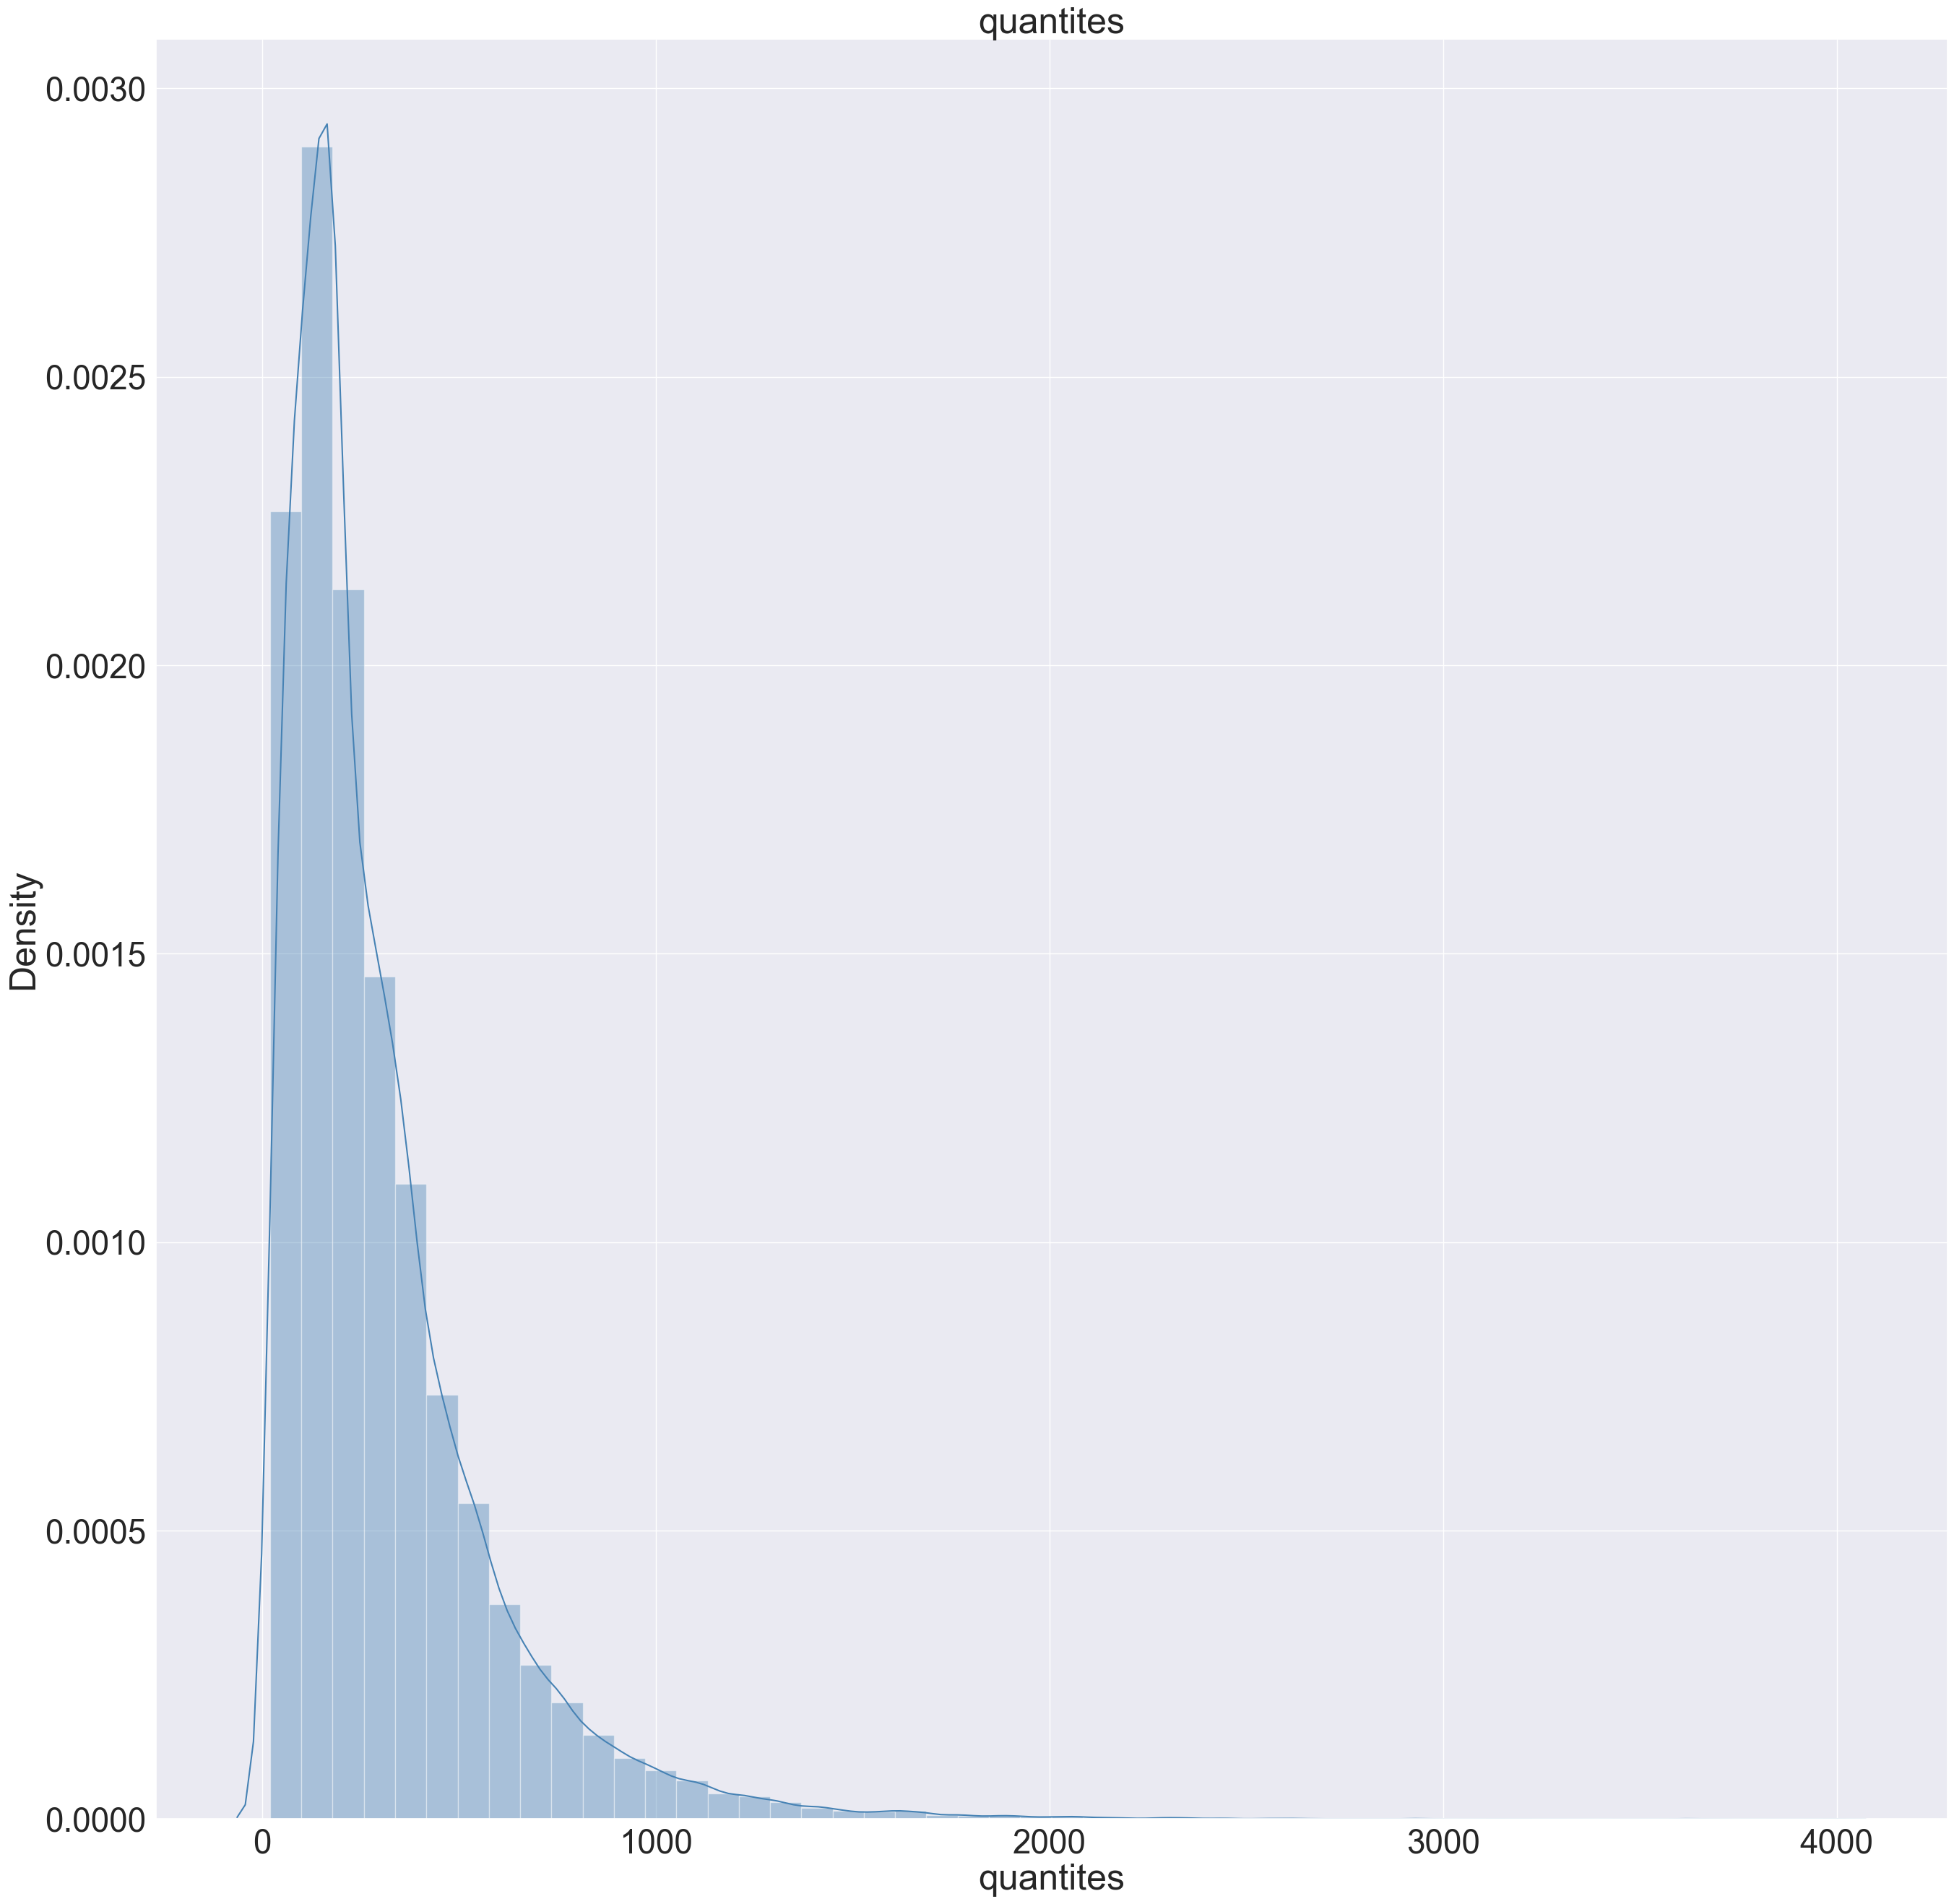

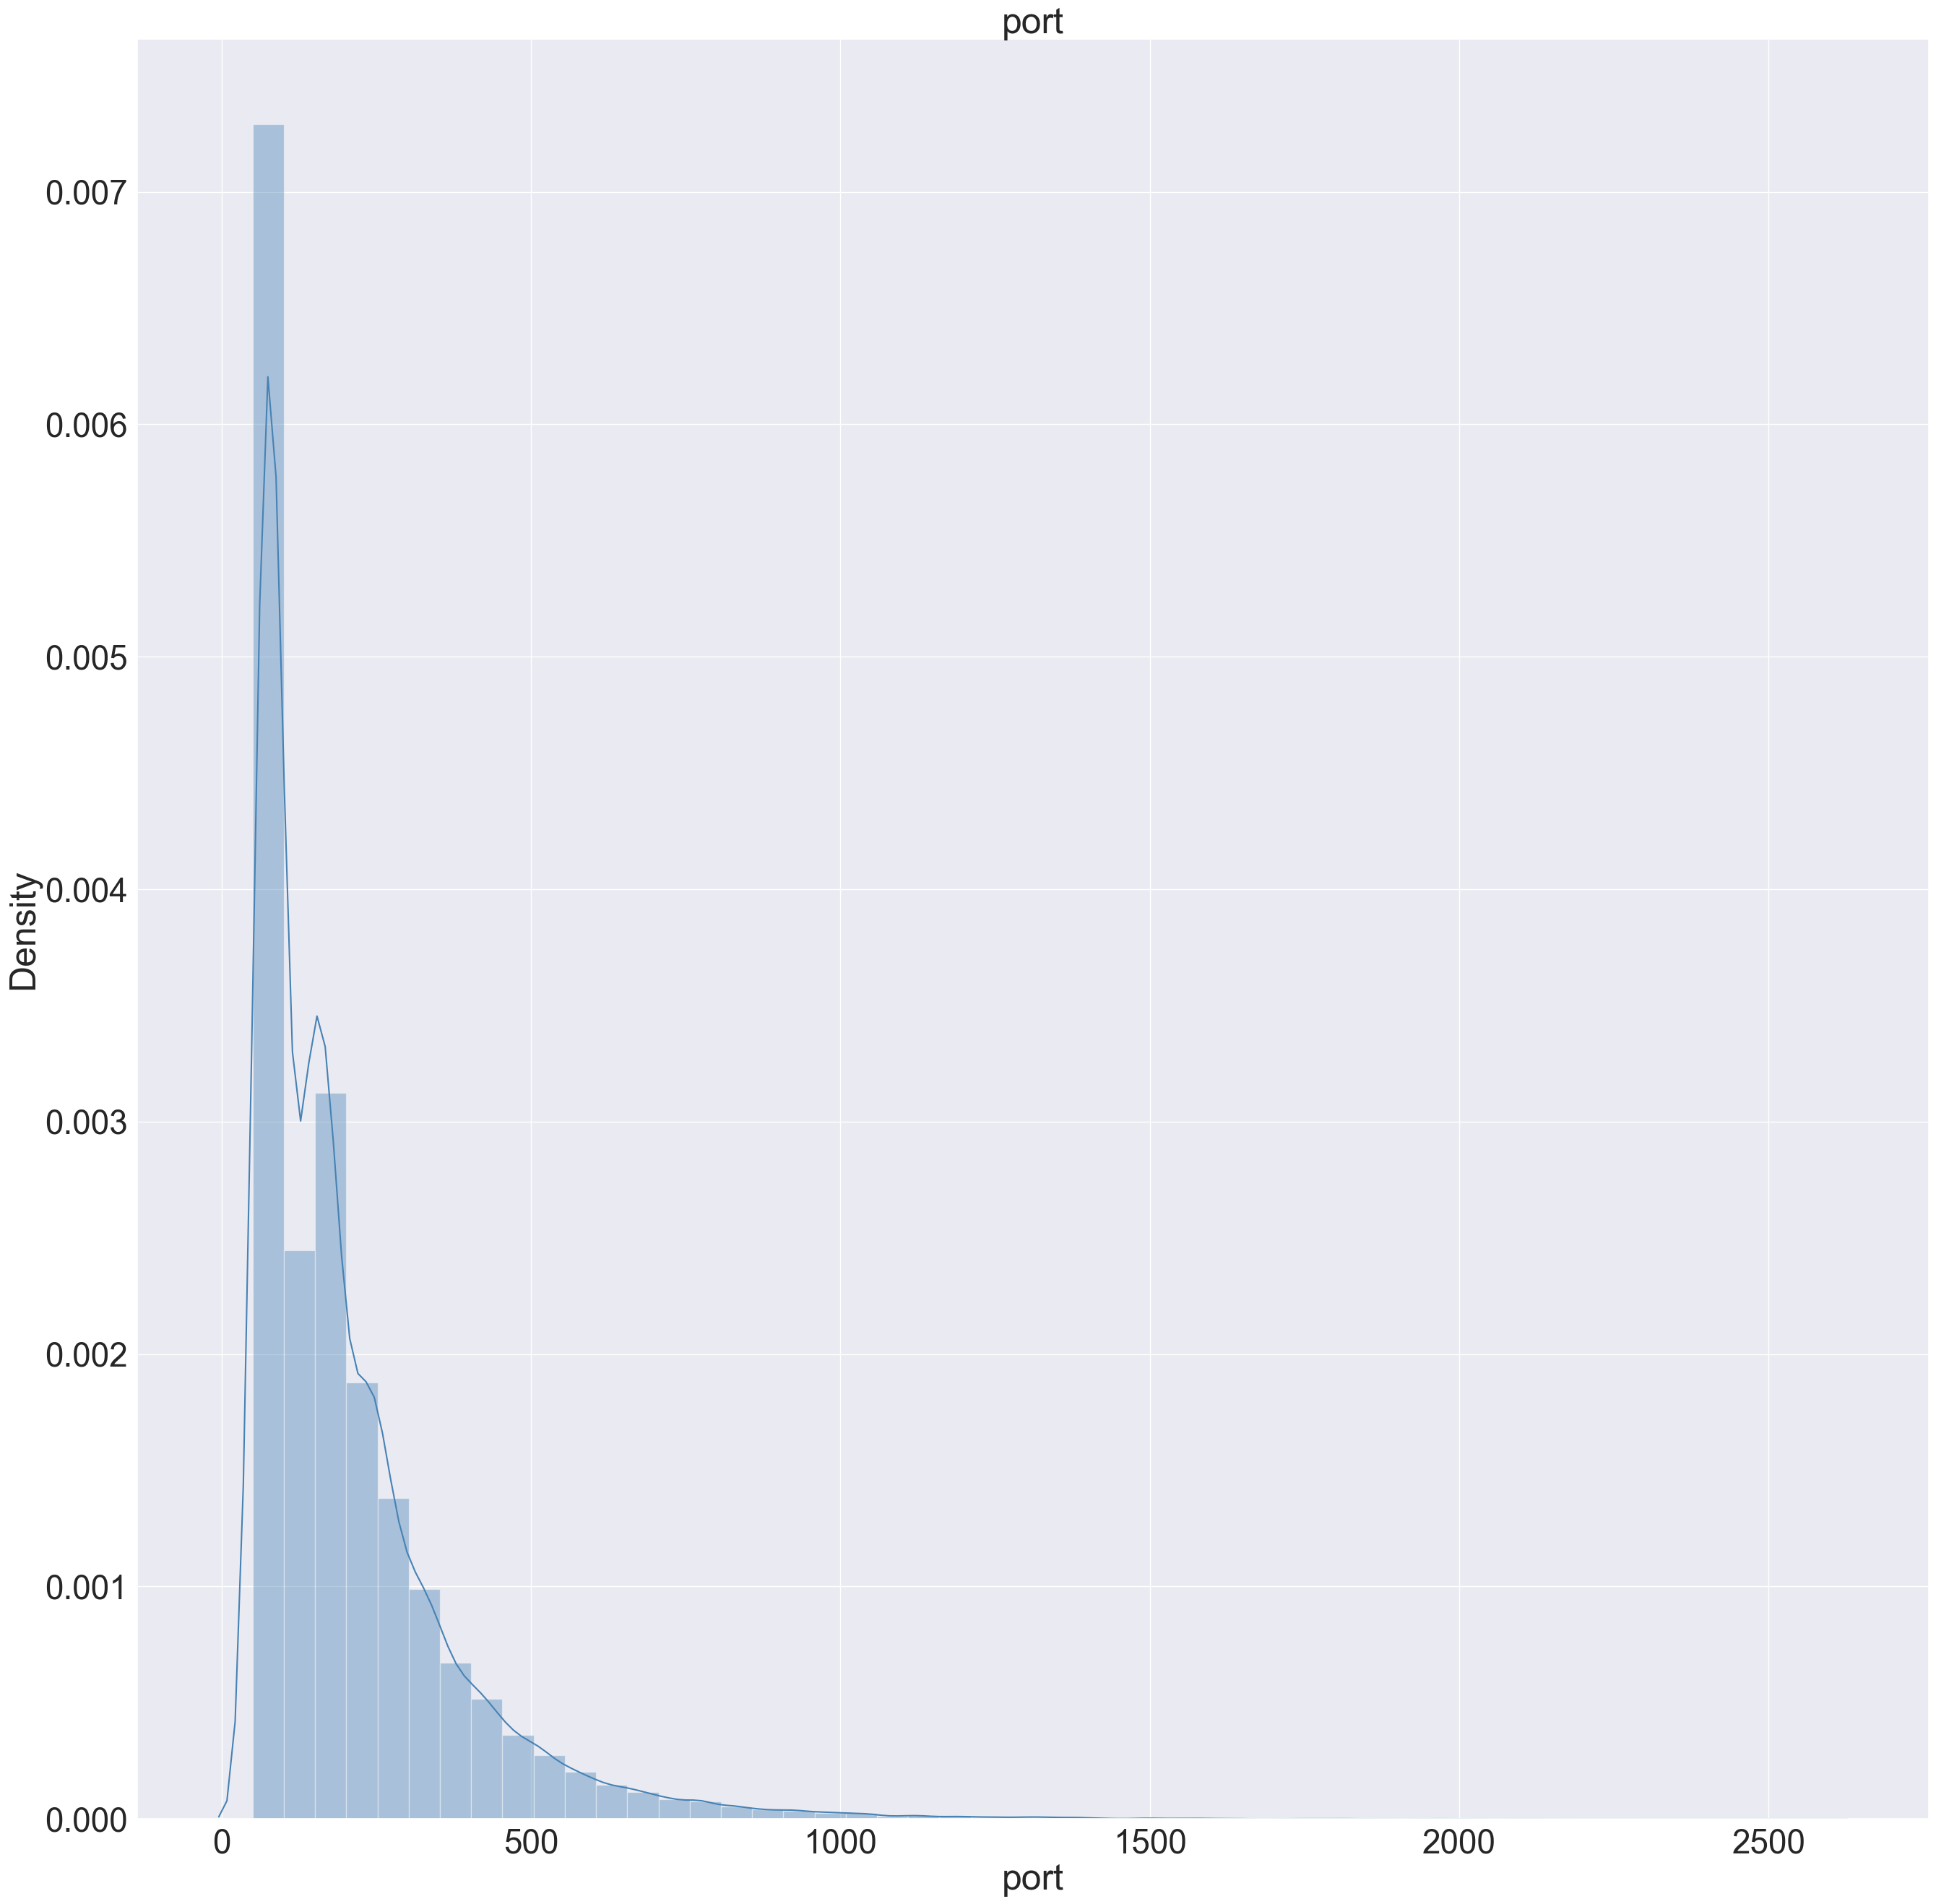

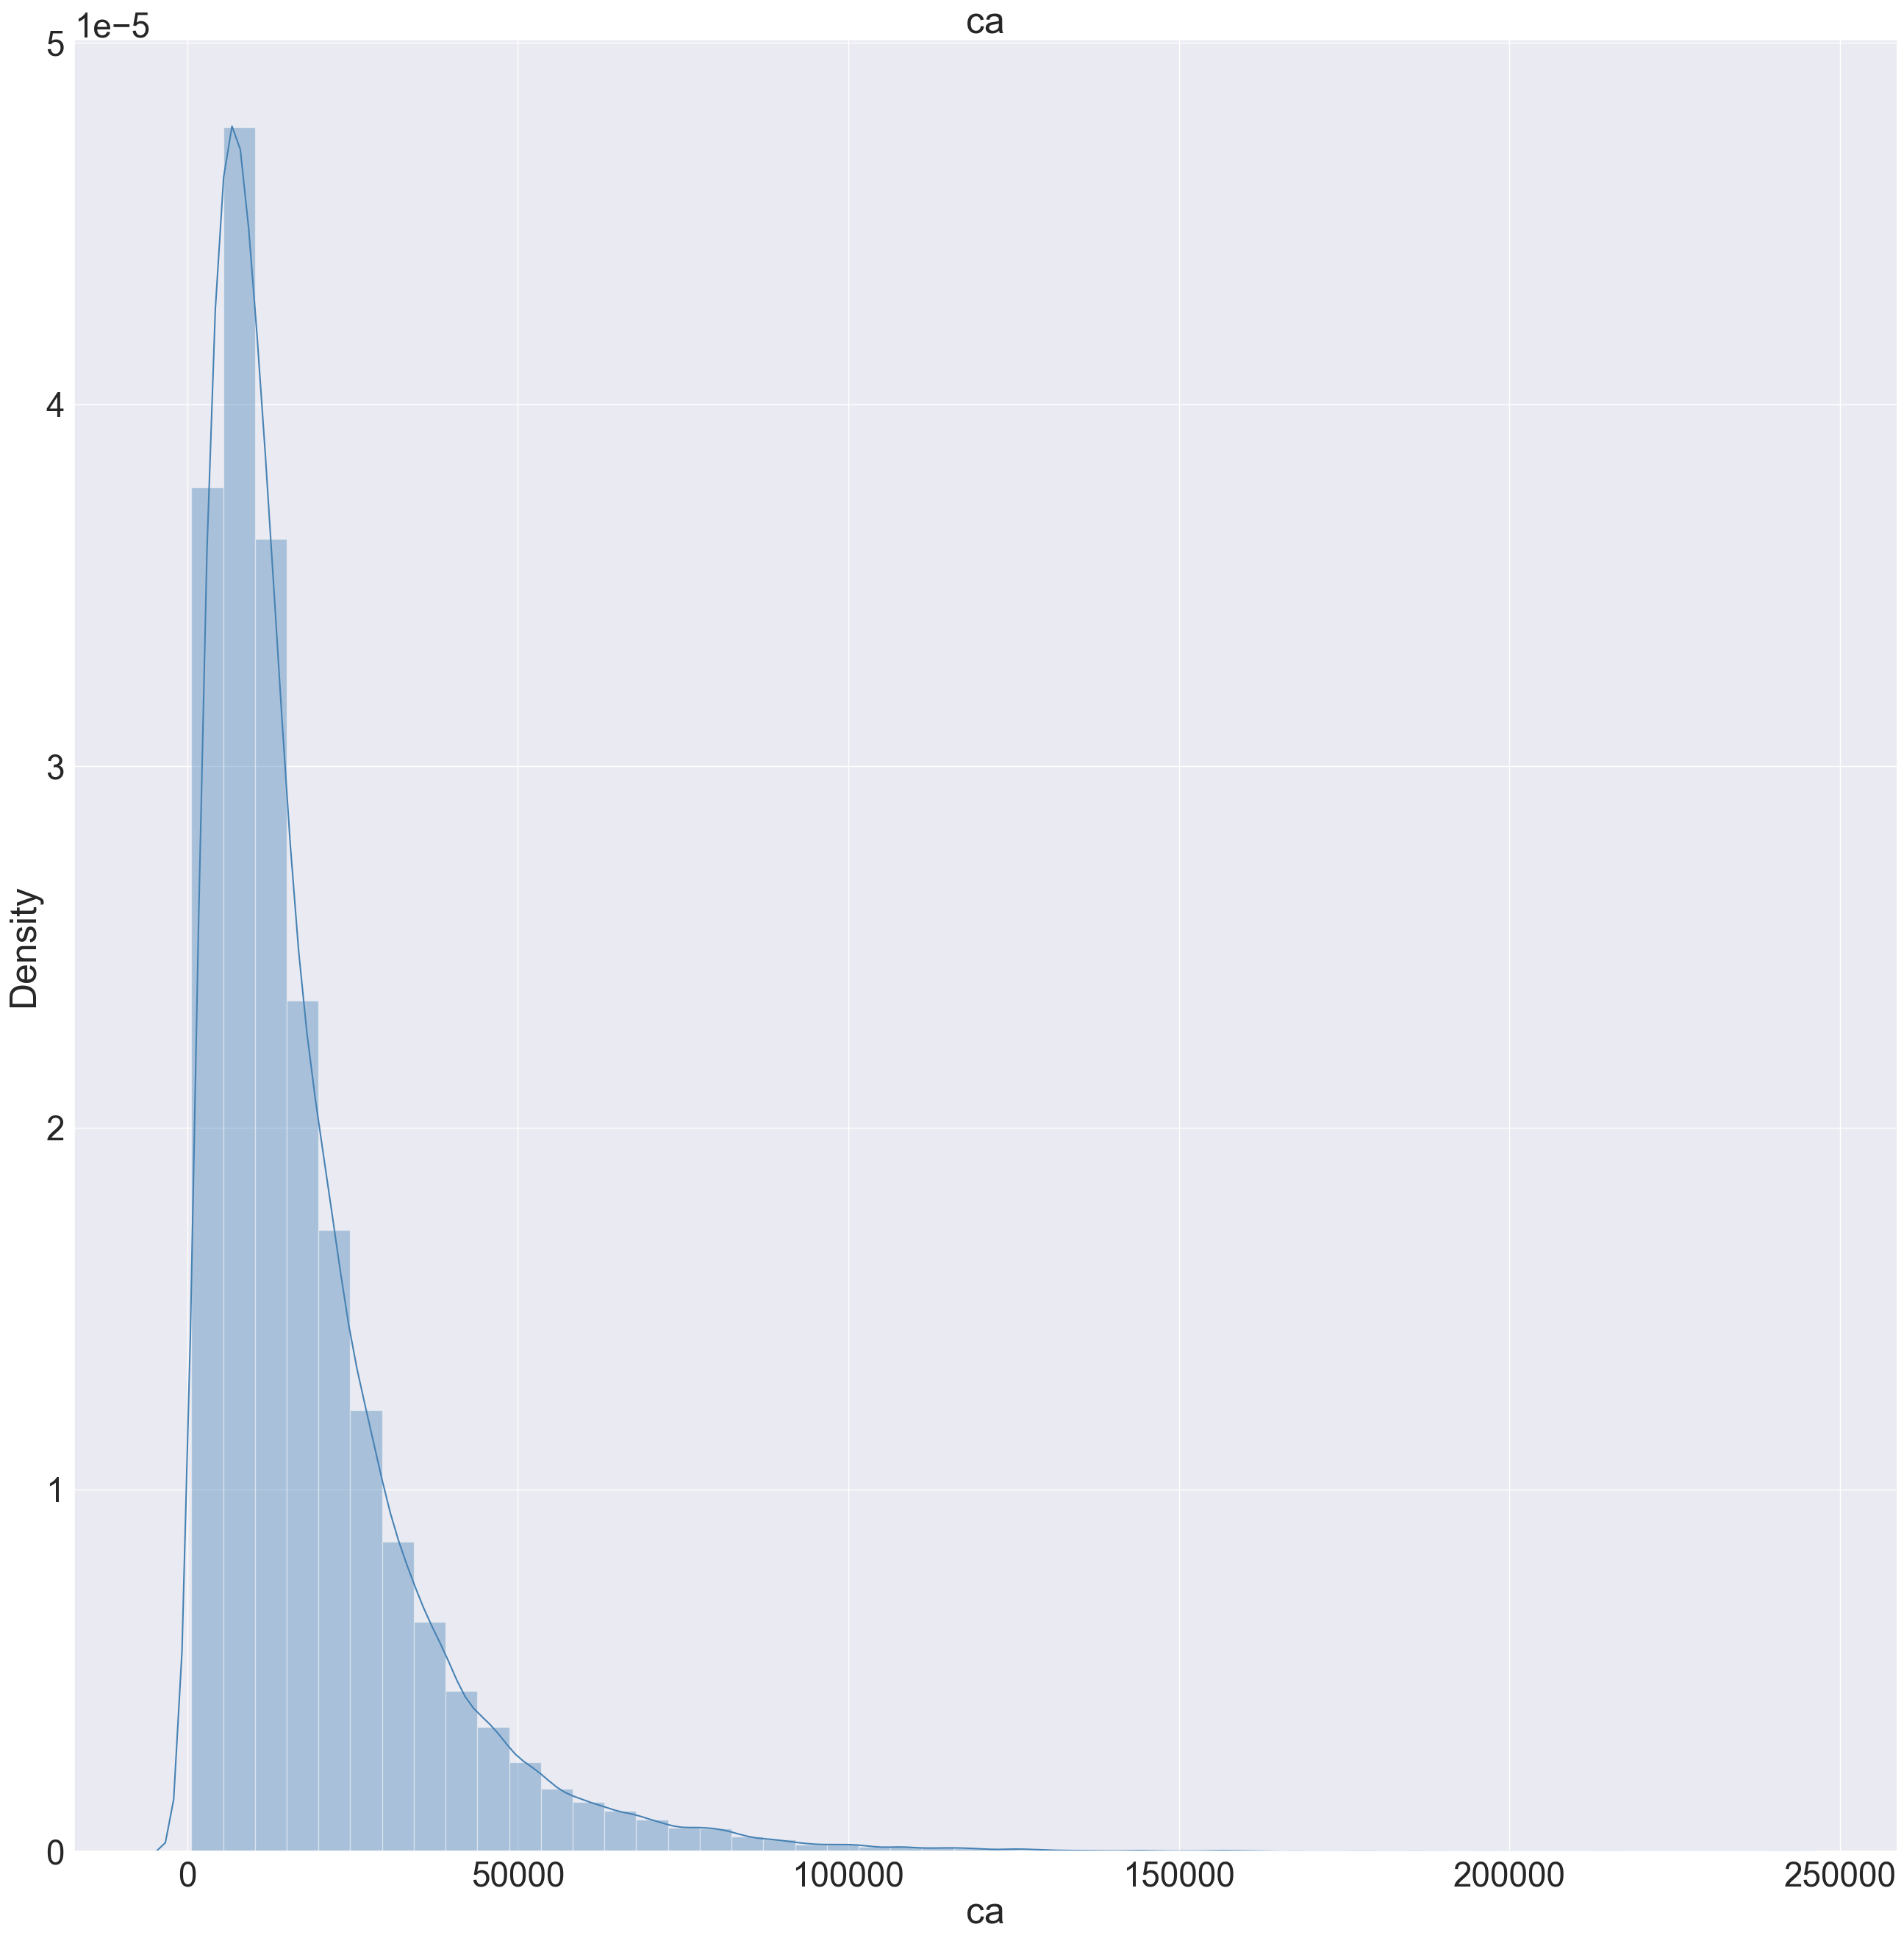

In [9]:
for colonne in ['quantites', 'port', 'ca']:
    plt.figure(figsize=(32,32))
    plt.title(colonne)
    sns.distplot(donnees[colonne], color="steelblue")
    plt.show()

In [10]:
colonne = 'ca'
plt.figure(figsize=(32,32))
sns.distplot(donnees[colonne][donnees.annee == 2017],color=palette[0], label='2017', hist_kws=dict(alpha=0.4),bins=30)
sns.distplot(donnees[colonne][donnees.annee == 2018],color=palette[1], label='2018', hist_kws=dict(alpha=0.4),bins=30)
sns.distplot(donnees[colonne][donnees.annee == 2019],color=palette[2], label='2019', hist_kws=dict(alpha=0.4),bins=30)
plt.legend();

# BarPlot

In [11]:
donnees.groupby(['pays']).agg({'quantites':['sum','mean','std']}).head(10)

quantites                        
                  sum        mean         std
pays                                         
Allemagne     3513087  321.328730  275.934158
Australie     1917714  409.943138  382.562018
Brésil        1273700  306.104302  263.558221
Canada         612557  292.949307  250.724501
Danemark       455152  234.131687  187.618348
Espagne        850147  252.044767  206.213000
France        1910002  254.768841  212.813486
Italie        3680638  301.296496  282.050289
Japon          892588  348.123245  278.494819
Royaume-Uni   1185406  282.306740  236.217575

In [12]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='pays',y='quantites',data=donnees.sort_values('pays'),palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

for i,nb in enumerate(donnees.groupby('pays').quantites.sum().sort_index().values):
    gbarplot.text(
                i ,
                nb-nb//3,
                nb,
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )

In [13]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='pays',y='quantites',data=donnees.sort_values('pays'),
                       palette=palette,alpha=0.8,estimator='sum')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

In [14]:
donnees.groupby(['pays']).agg({'quantites':['sum','mean','std']}).head(10)

quantites                        
                  sum        mean         std
pays                                         
Allemagne     3513087  321.328730  275.934158
Australie     1917714  409.943138  382.562018
Brésil        1273700  306.104302  263.558221
Canada         612557  292.949307  250.724501
Danemark       455152  234.131687  187.618348
Espagne        850147  252.044767  206.213000
France        1910002  254.768841  212.813486
Italie        3680638  301.296496  282.050289
Japon          892588  348.123245  278.494819
Royaume-Uni   1185406  282.306740  236.217575

In [15]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='pays',y='quantites',data=donnees.sort_values('pays'),
                       palette=palette, alpha=0.8, estimator='mean')
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

for i,nb in enumerate(donnees.groupby('pays').quantites.mean().sort_index().values):
    gbarplot.text(
                i ,
                nb-nb//2,
                round(nb,2),
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )
    

In [16]:
donnees.groupby(['pays']).agg({'quantites':['sum','mean','std']}).head(10)

quantites                        
                  sum        mean         std
pays                                         
Allemagne     3513087  321.328730  275.934158
Australie     1917714  409.943138  382.562018
Brésil        1273700  306.104302  263.558221
Canada         612557  292.949307  250.724501
Danemark       455152  234.131687  187.618348
Espagne        850147  252.044767  206.213000
France        1910002  254.768841  212.813486
Italie        3680638  301.296496  282.050289
Japon          892588  348.123245  278.494819
Royaume-Uni   1185406  282.306740  236.217575

In [17]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='pays',y='quantites',data=donnees, palette=palette, alpha=0.8, estimator=np.std)
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

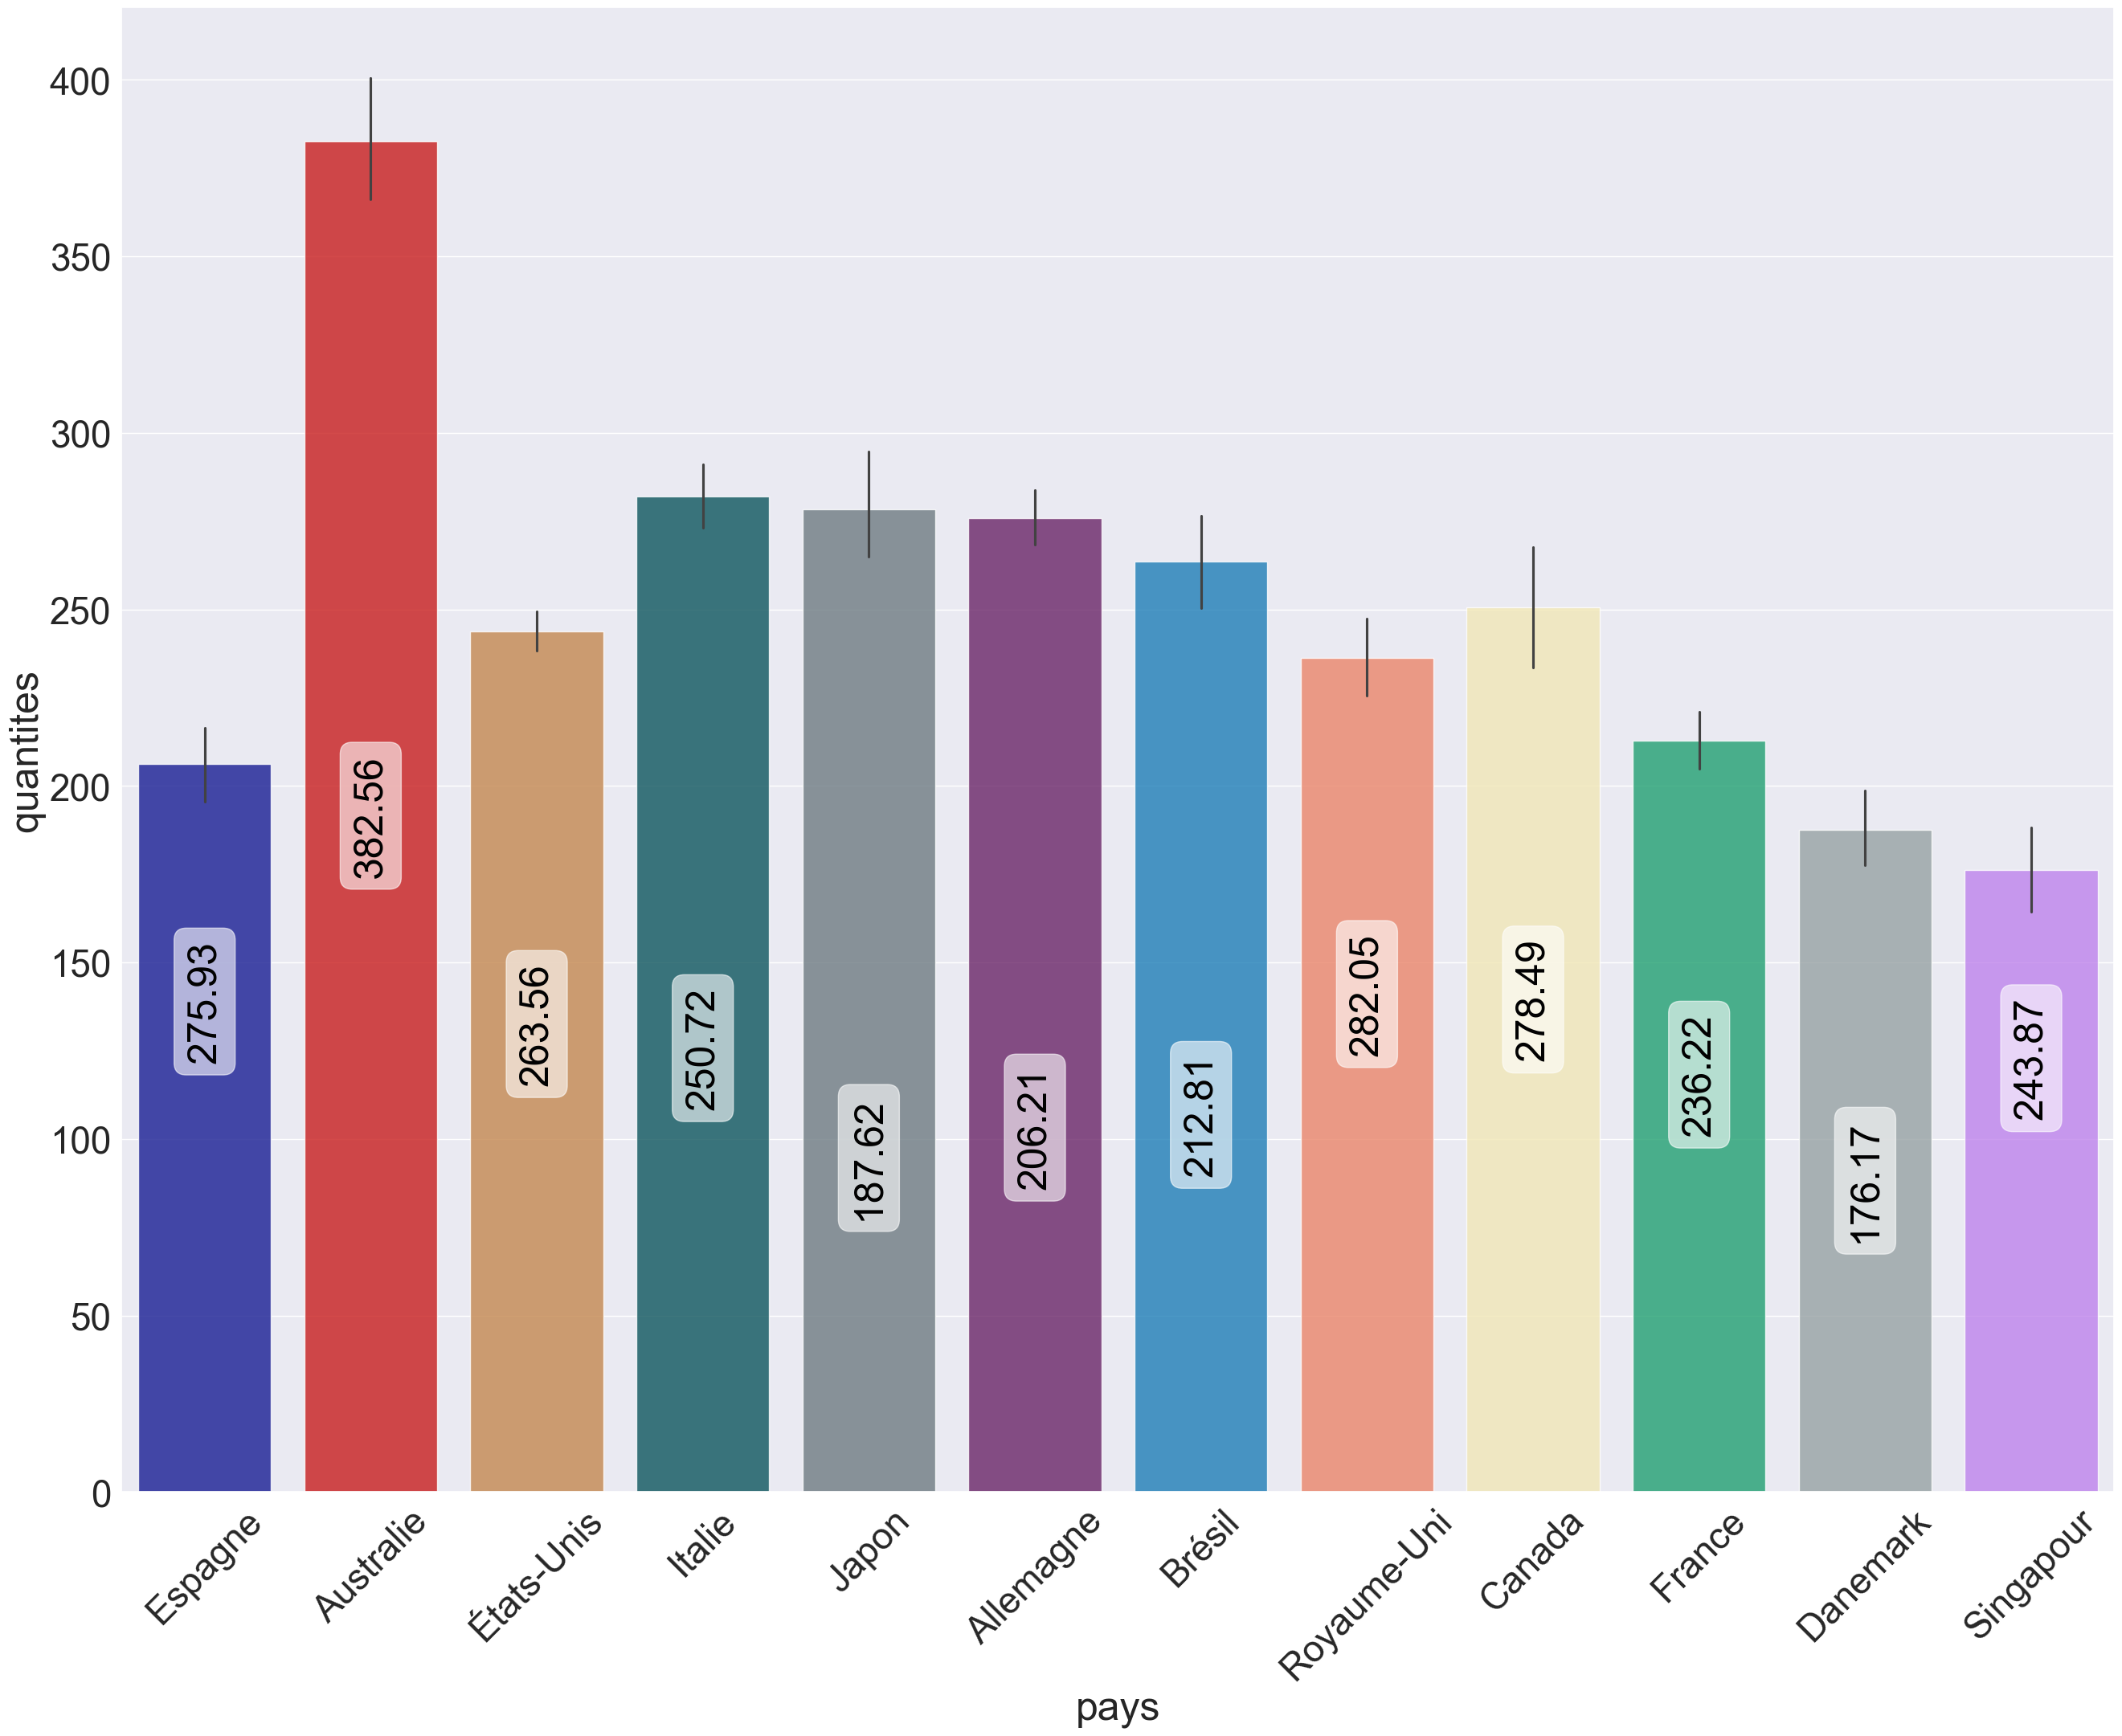

In [18]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='pays',y='quantites',data=donnees, palette=palette, alpha=0.8, estimator=np.std)
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);


for i,nb in enumerate(donnees.groupby('pays').quantites.std().sort_index().values):
    gbarplot.text(
                i ,
                nb-nb//2,
                round(nb,2),
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )
plt.gcf()

# CatPlot

In [19]:
donnees.groupby(['pays','annee']).agg({'port':['mean','std']}).head(10).reset_index()

pays annee        port            
                          mean         std
0  Allemagne  2017  234.759155  188.417862
1  Allemagne  2018  243.104202  205.209305
2  Allemagne  2019  181.712189  145.327850
3  Australie  2017  272.298309  232.296280
4  Australie  2018  320.641693  273.431610
5  Australie  2019  237.788544  204.777420
6     Brésil  2017  230.076889  200.703125
7     Brésil  2018  210.826385  158.051620
8     Brésil  2019  197.651566  158.438156
9     Canada  2017  201.453354  153.046982

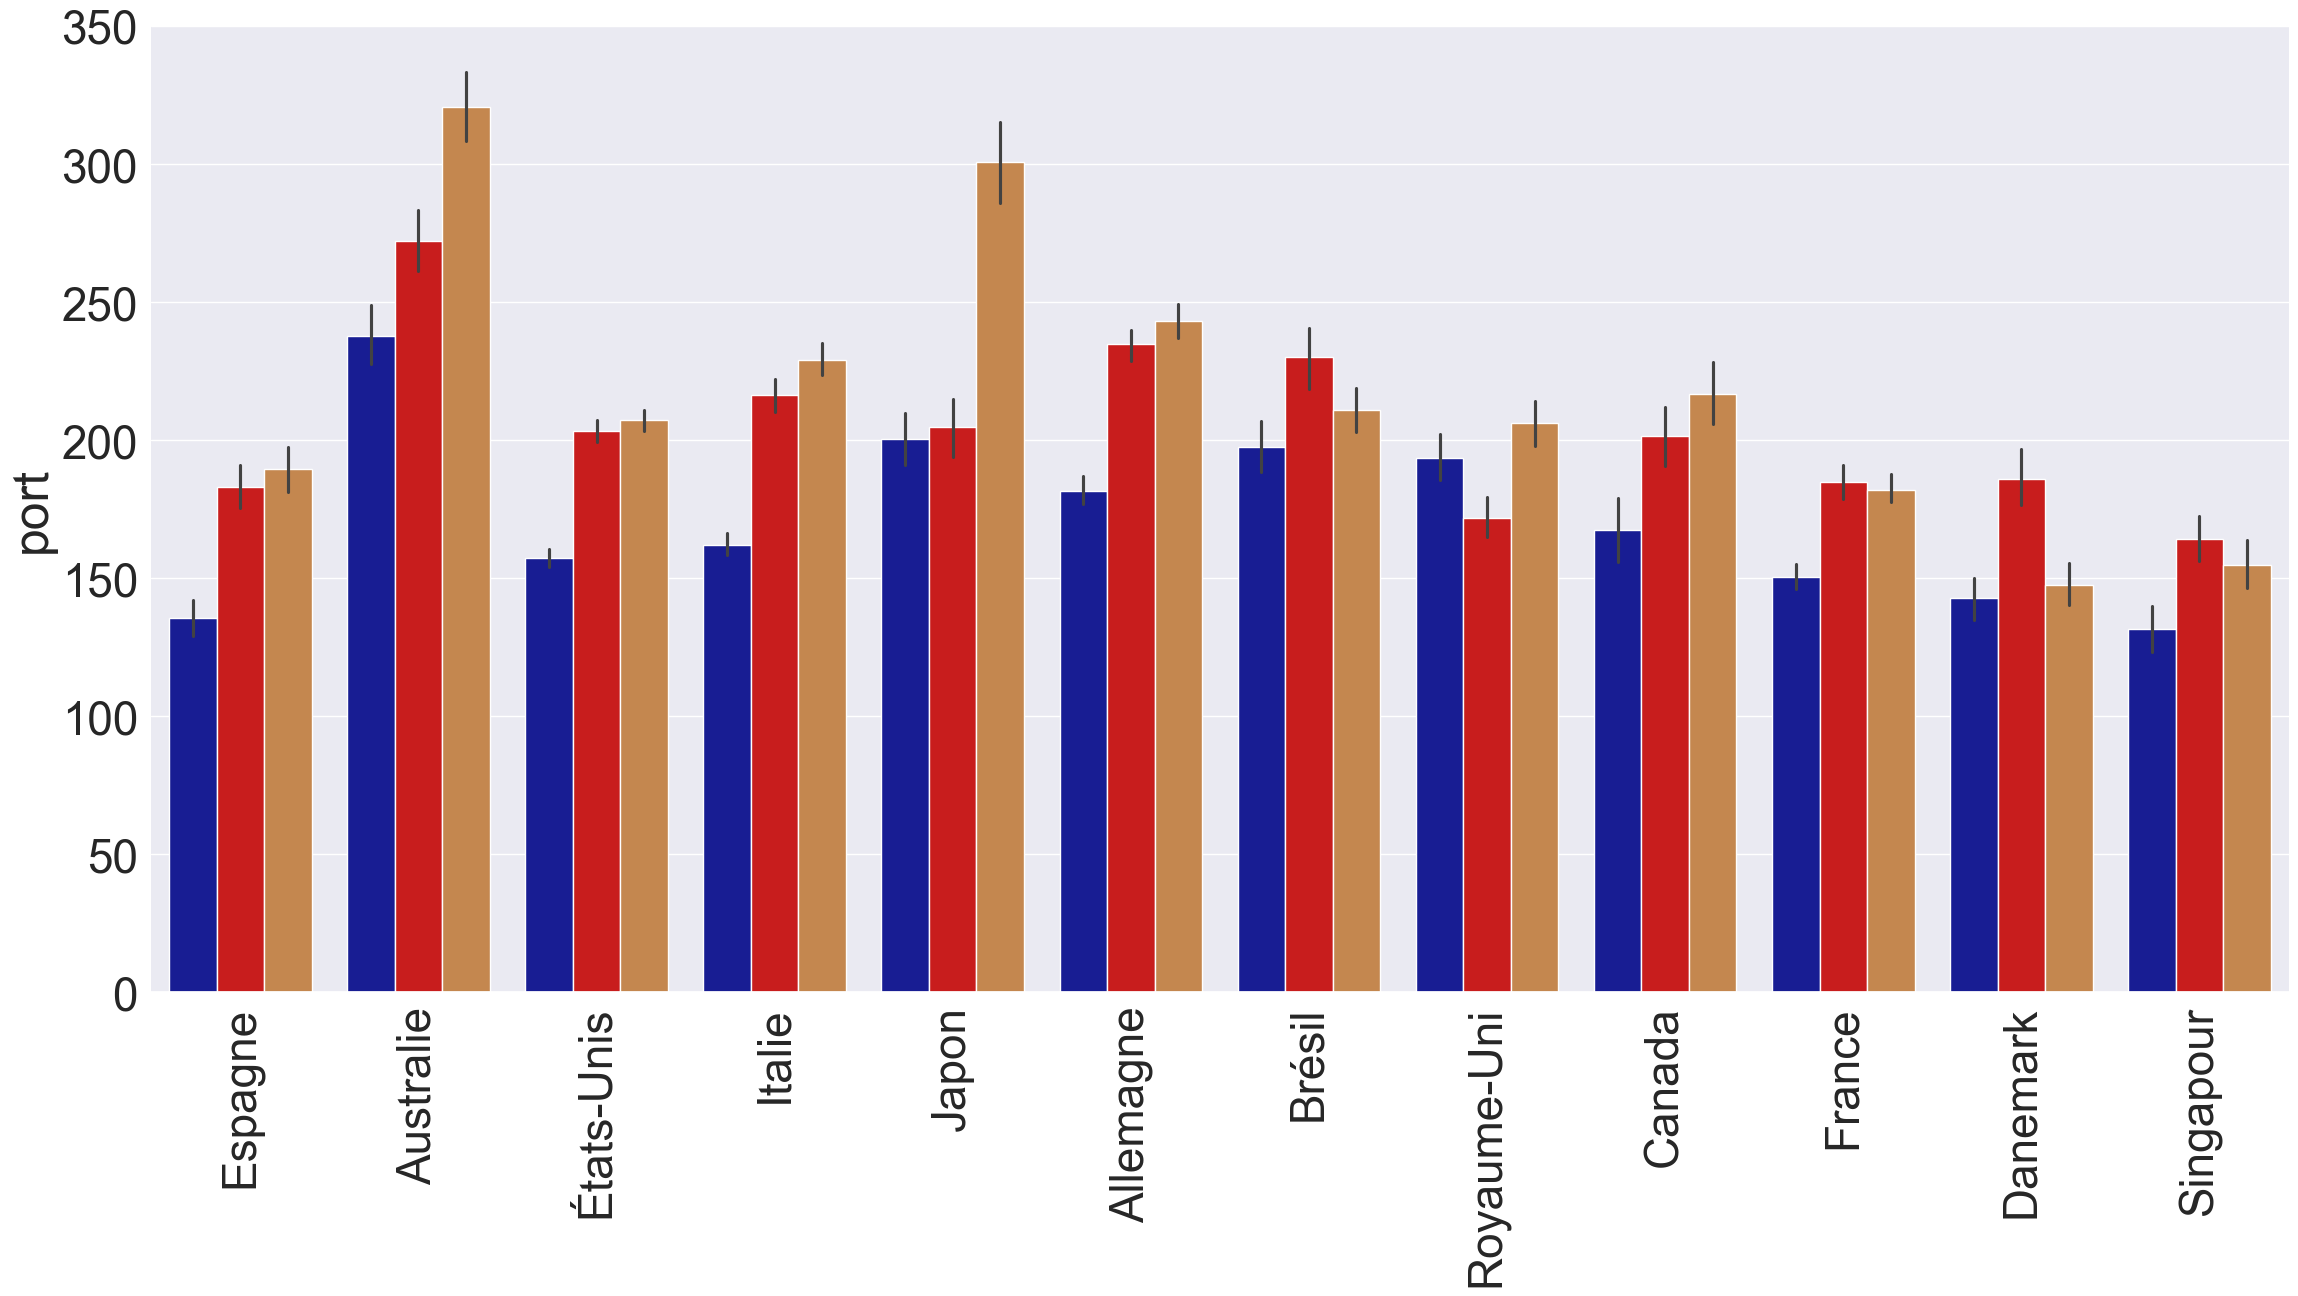

In [20]:
graph = sns.catplot(x="pays", 
                    y="port", 
                    hue=donnees['annee'].astype(str),
                    data=donnees,
                    height=12, 
                    kind="bar", 
                    aspect=2,
                    palette=palette,
                    legend=False);

graph.despine(left=True)
graph.set_xticklabels(rotation=90)
graph.set_xlabels('')
# graph.set_ylabels('')
plt.legend(loc='upper right', title_fontsize=20, fontsize=20)
plt.gcf()

# CountPlot

In [21]:
#donnees.groupby(['pays']).agg({'port':['count']}).reset_index()

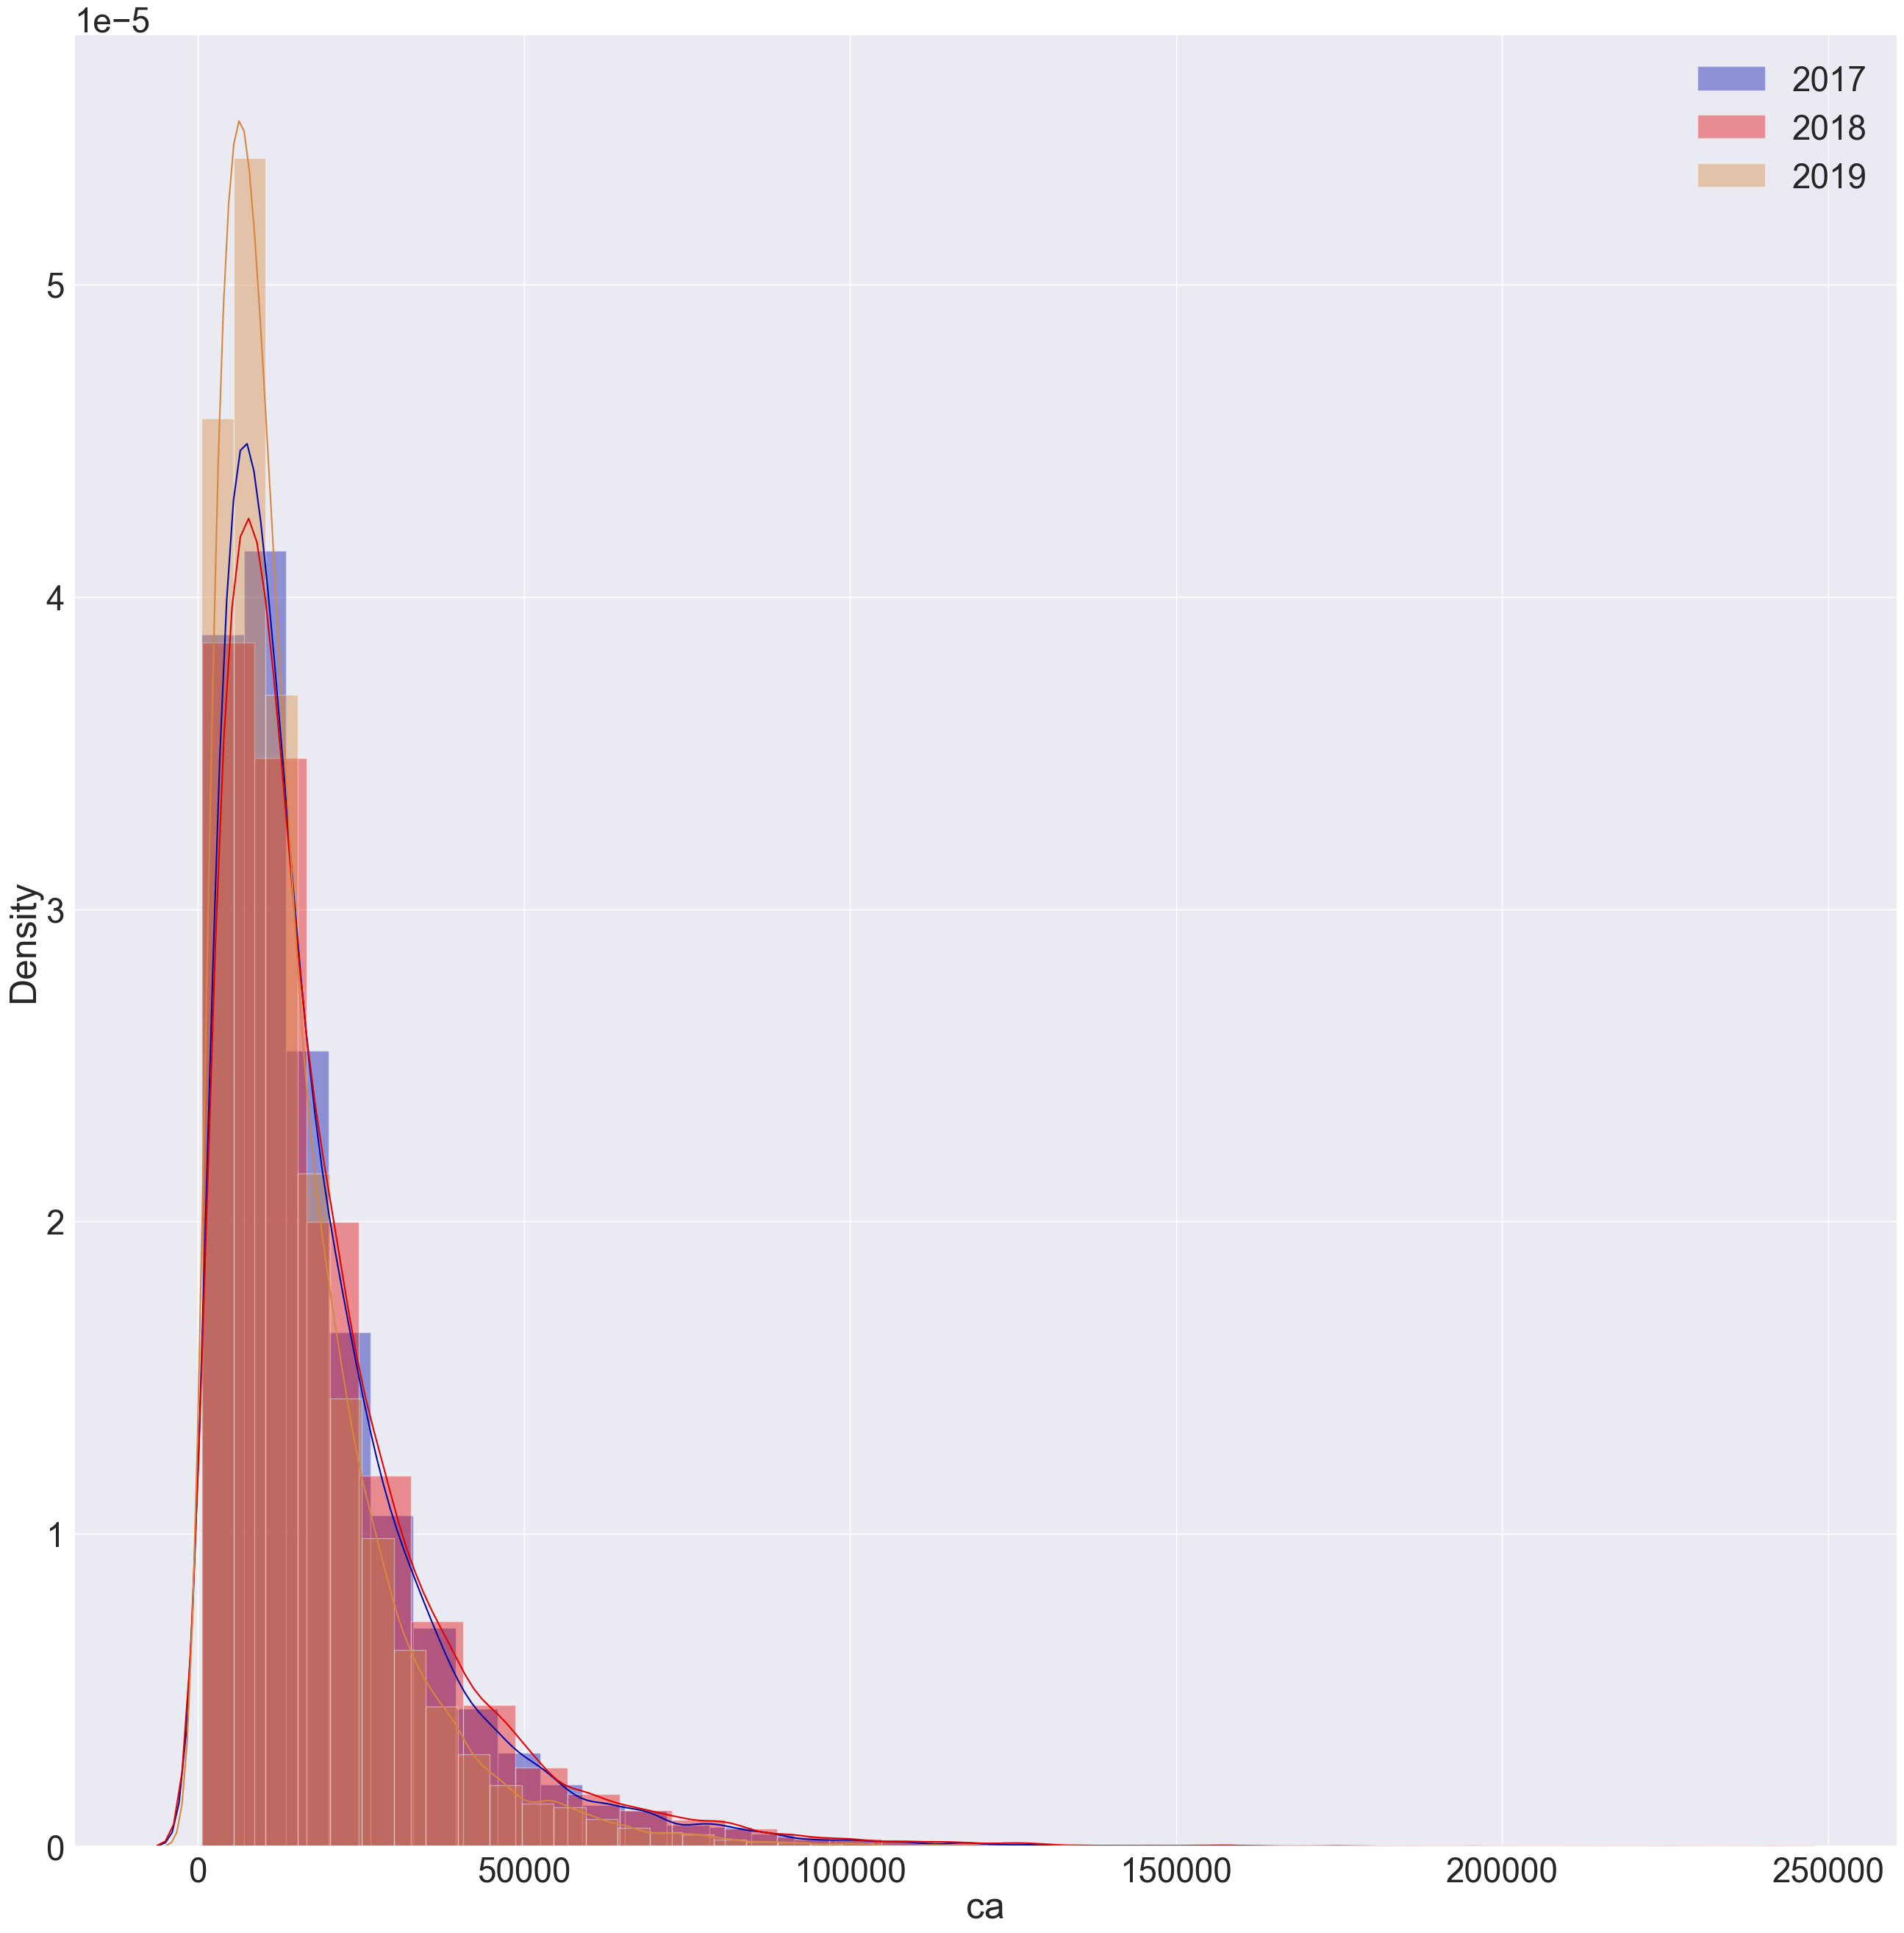

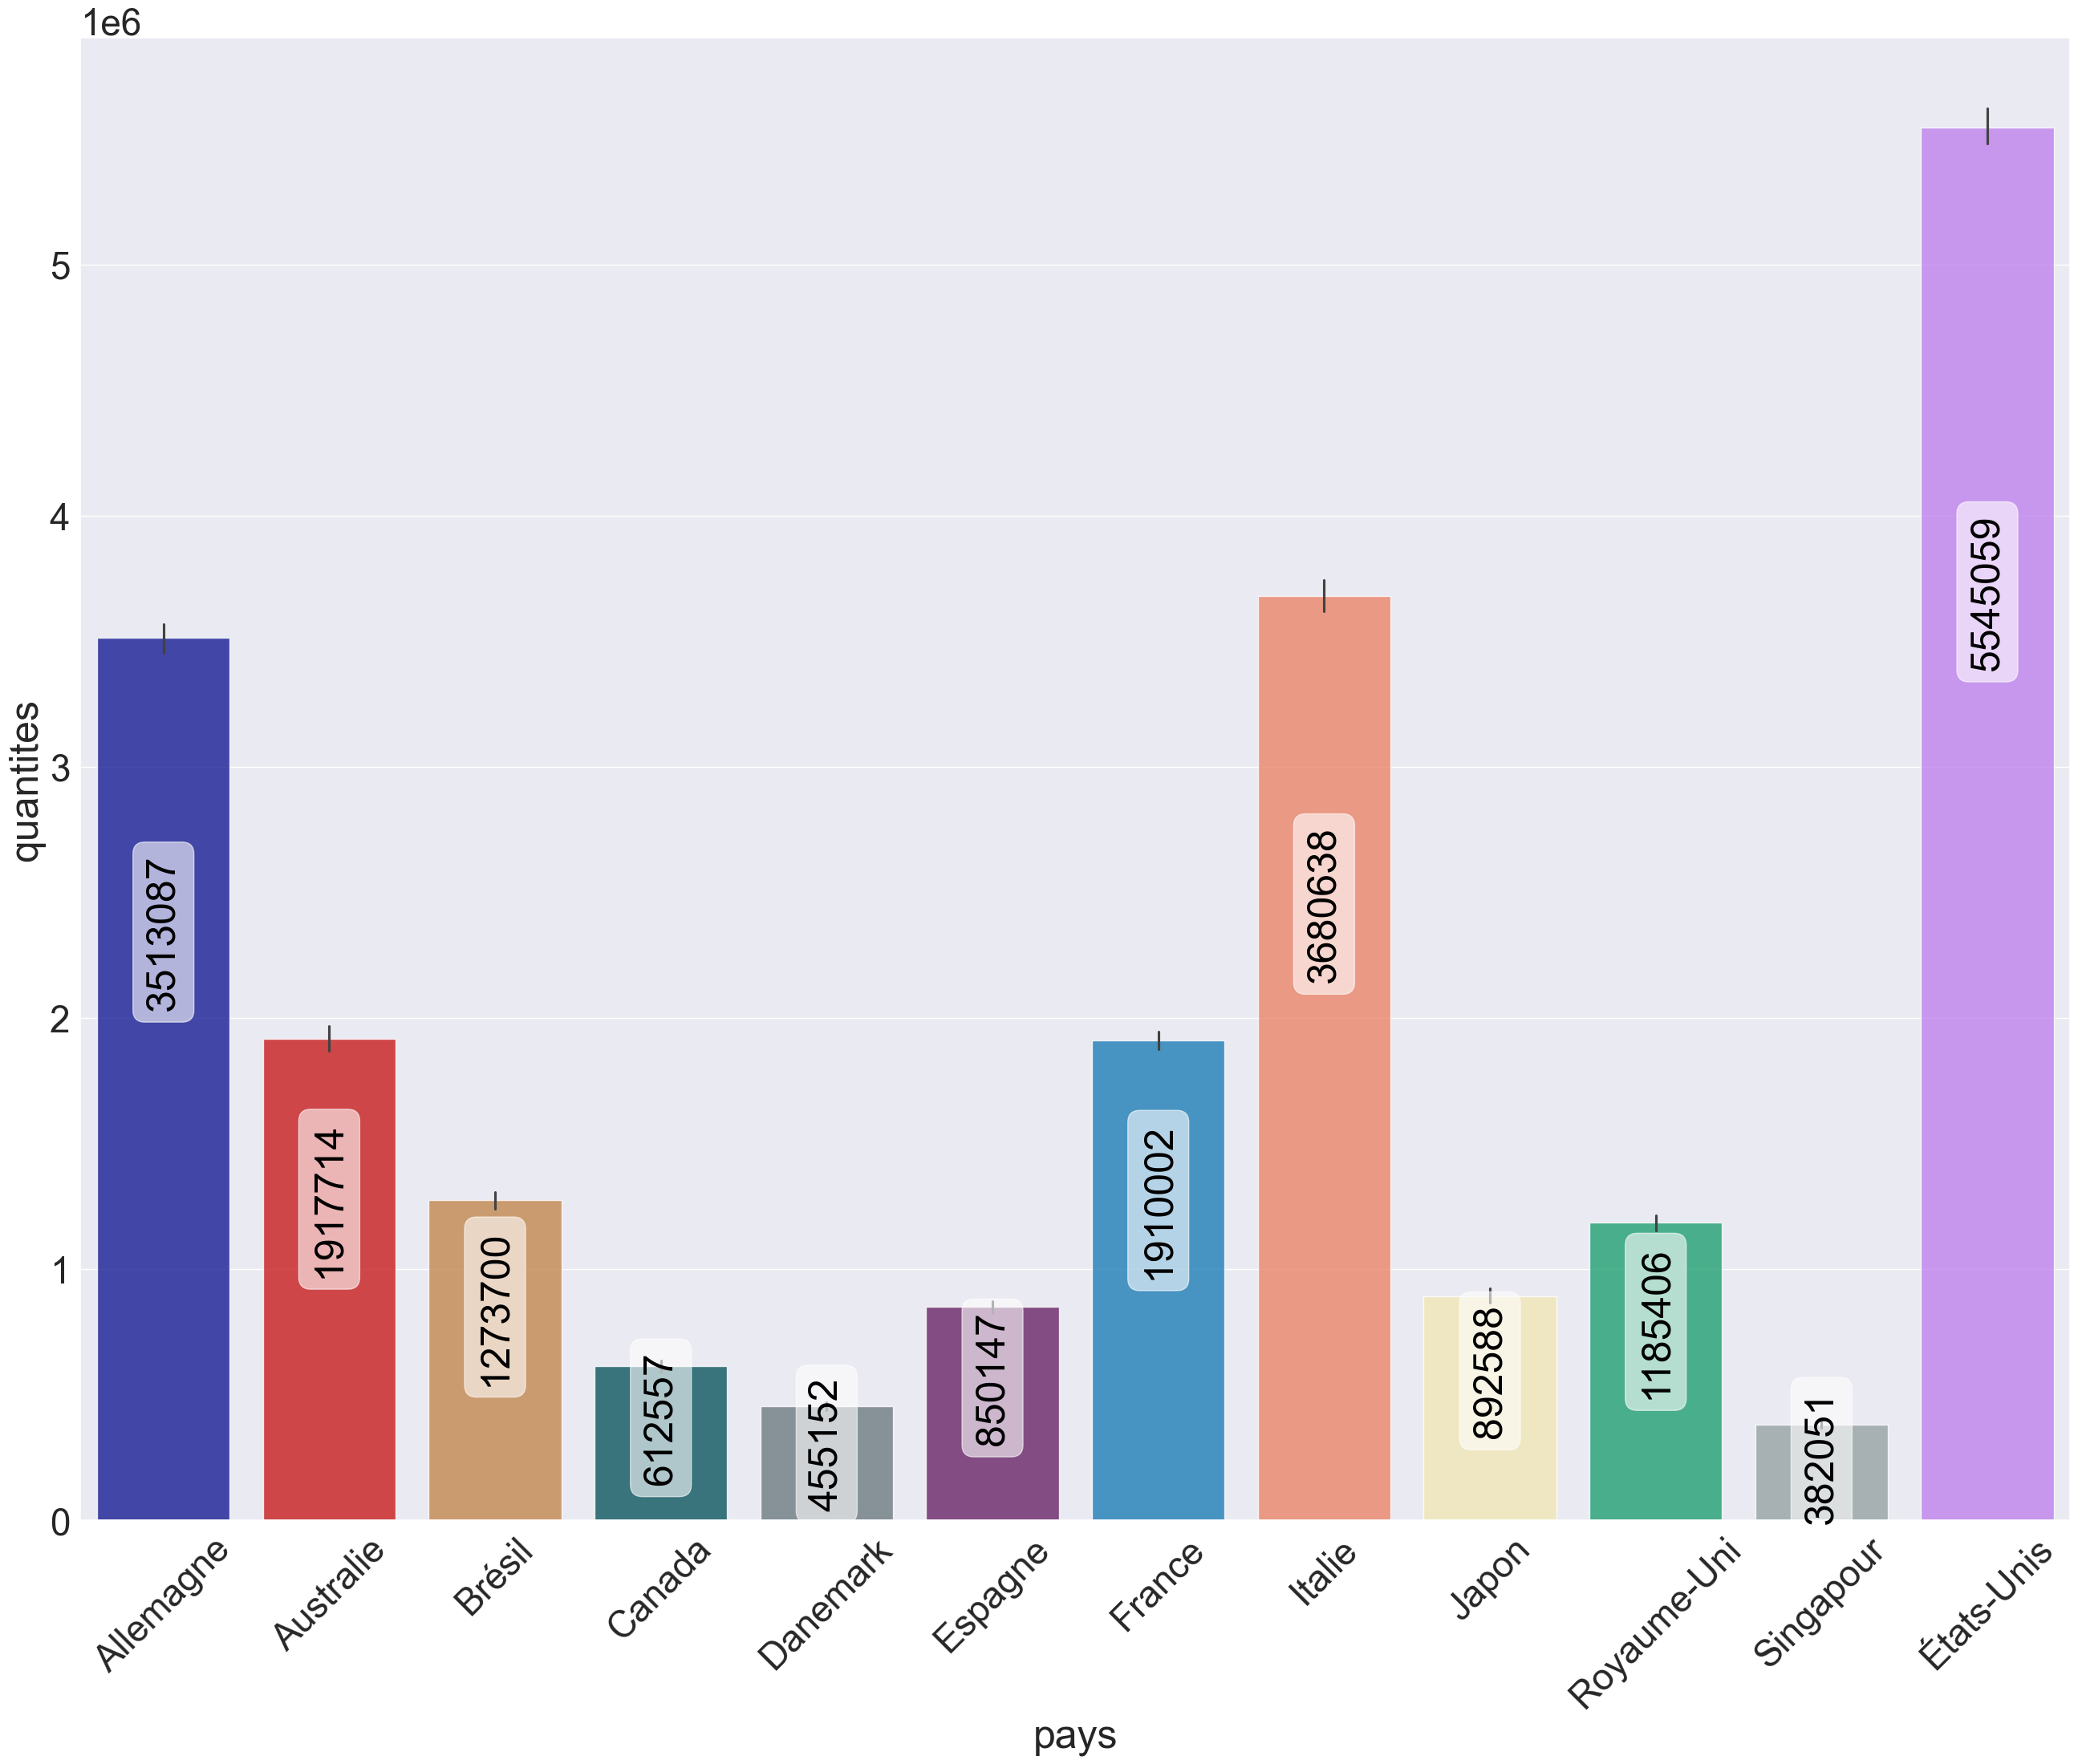

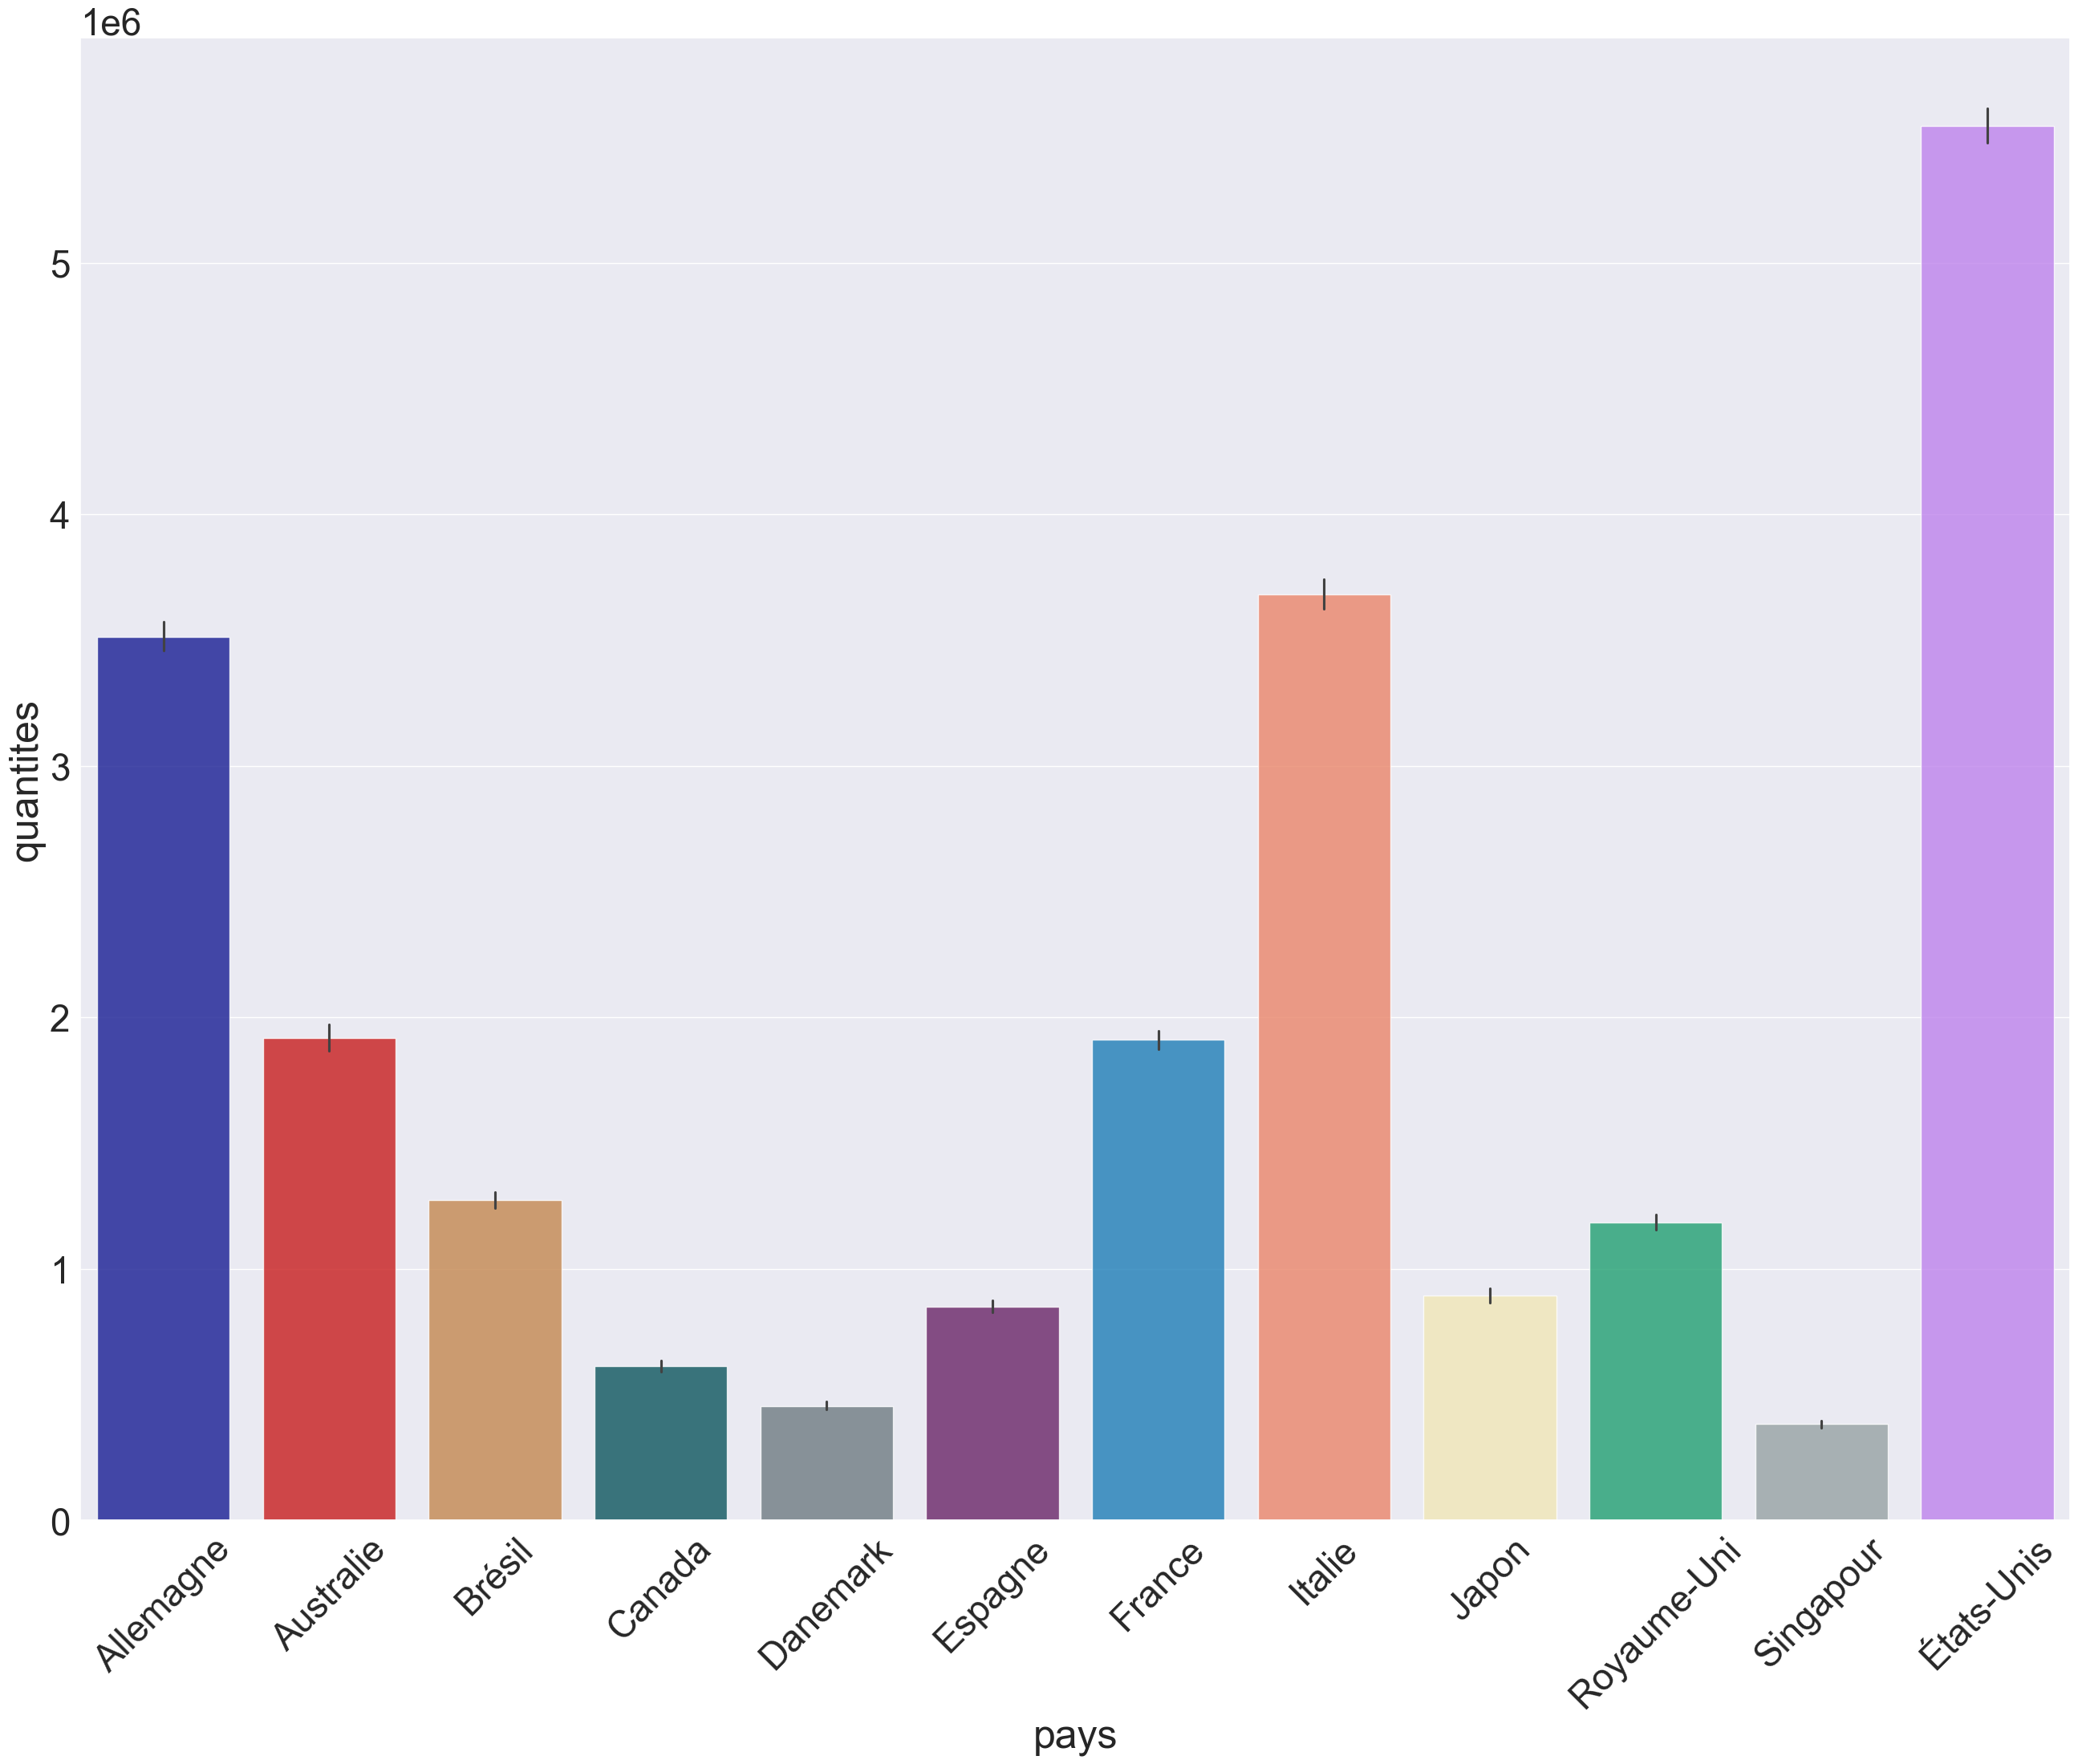

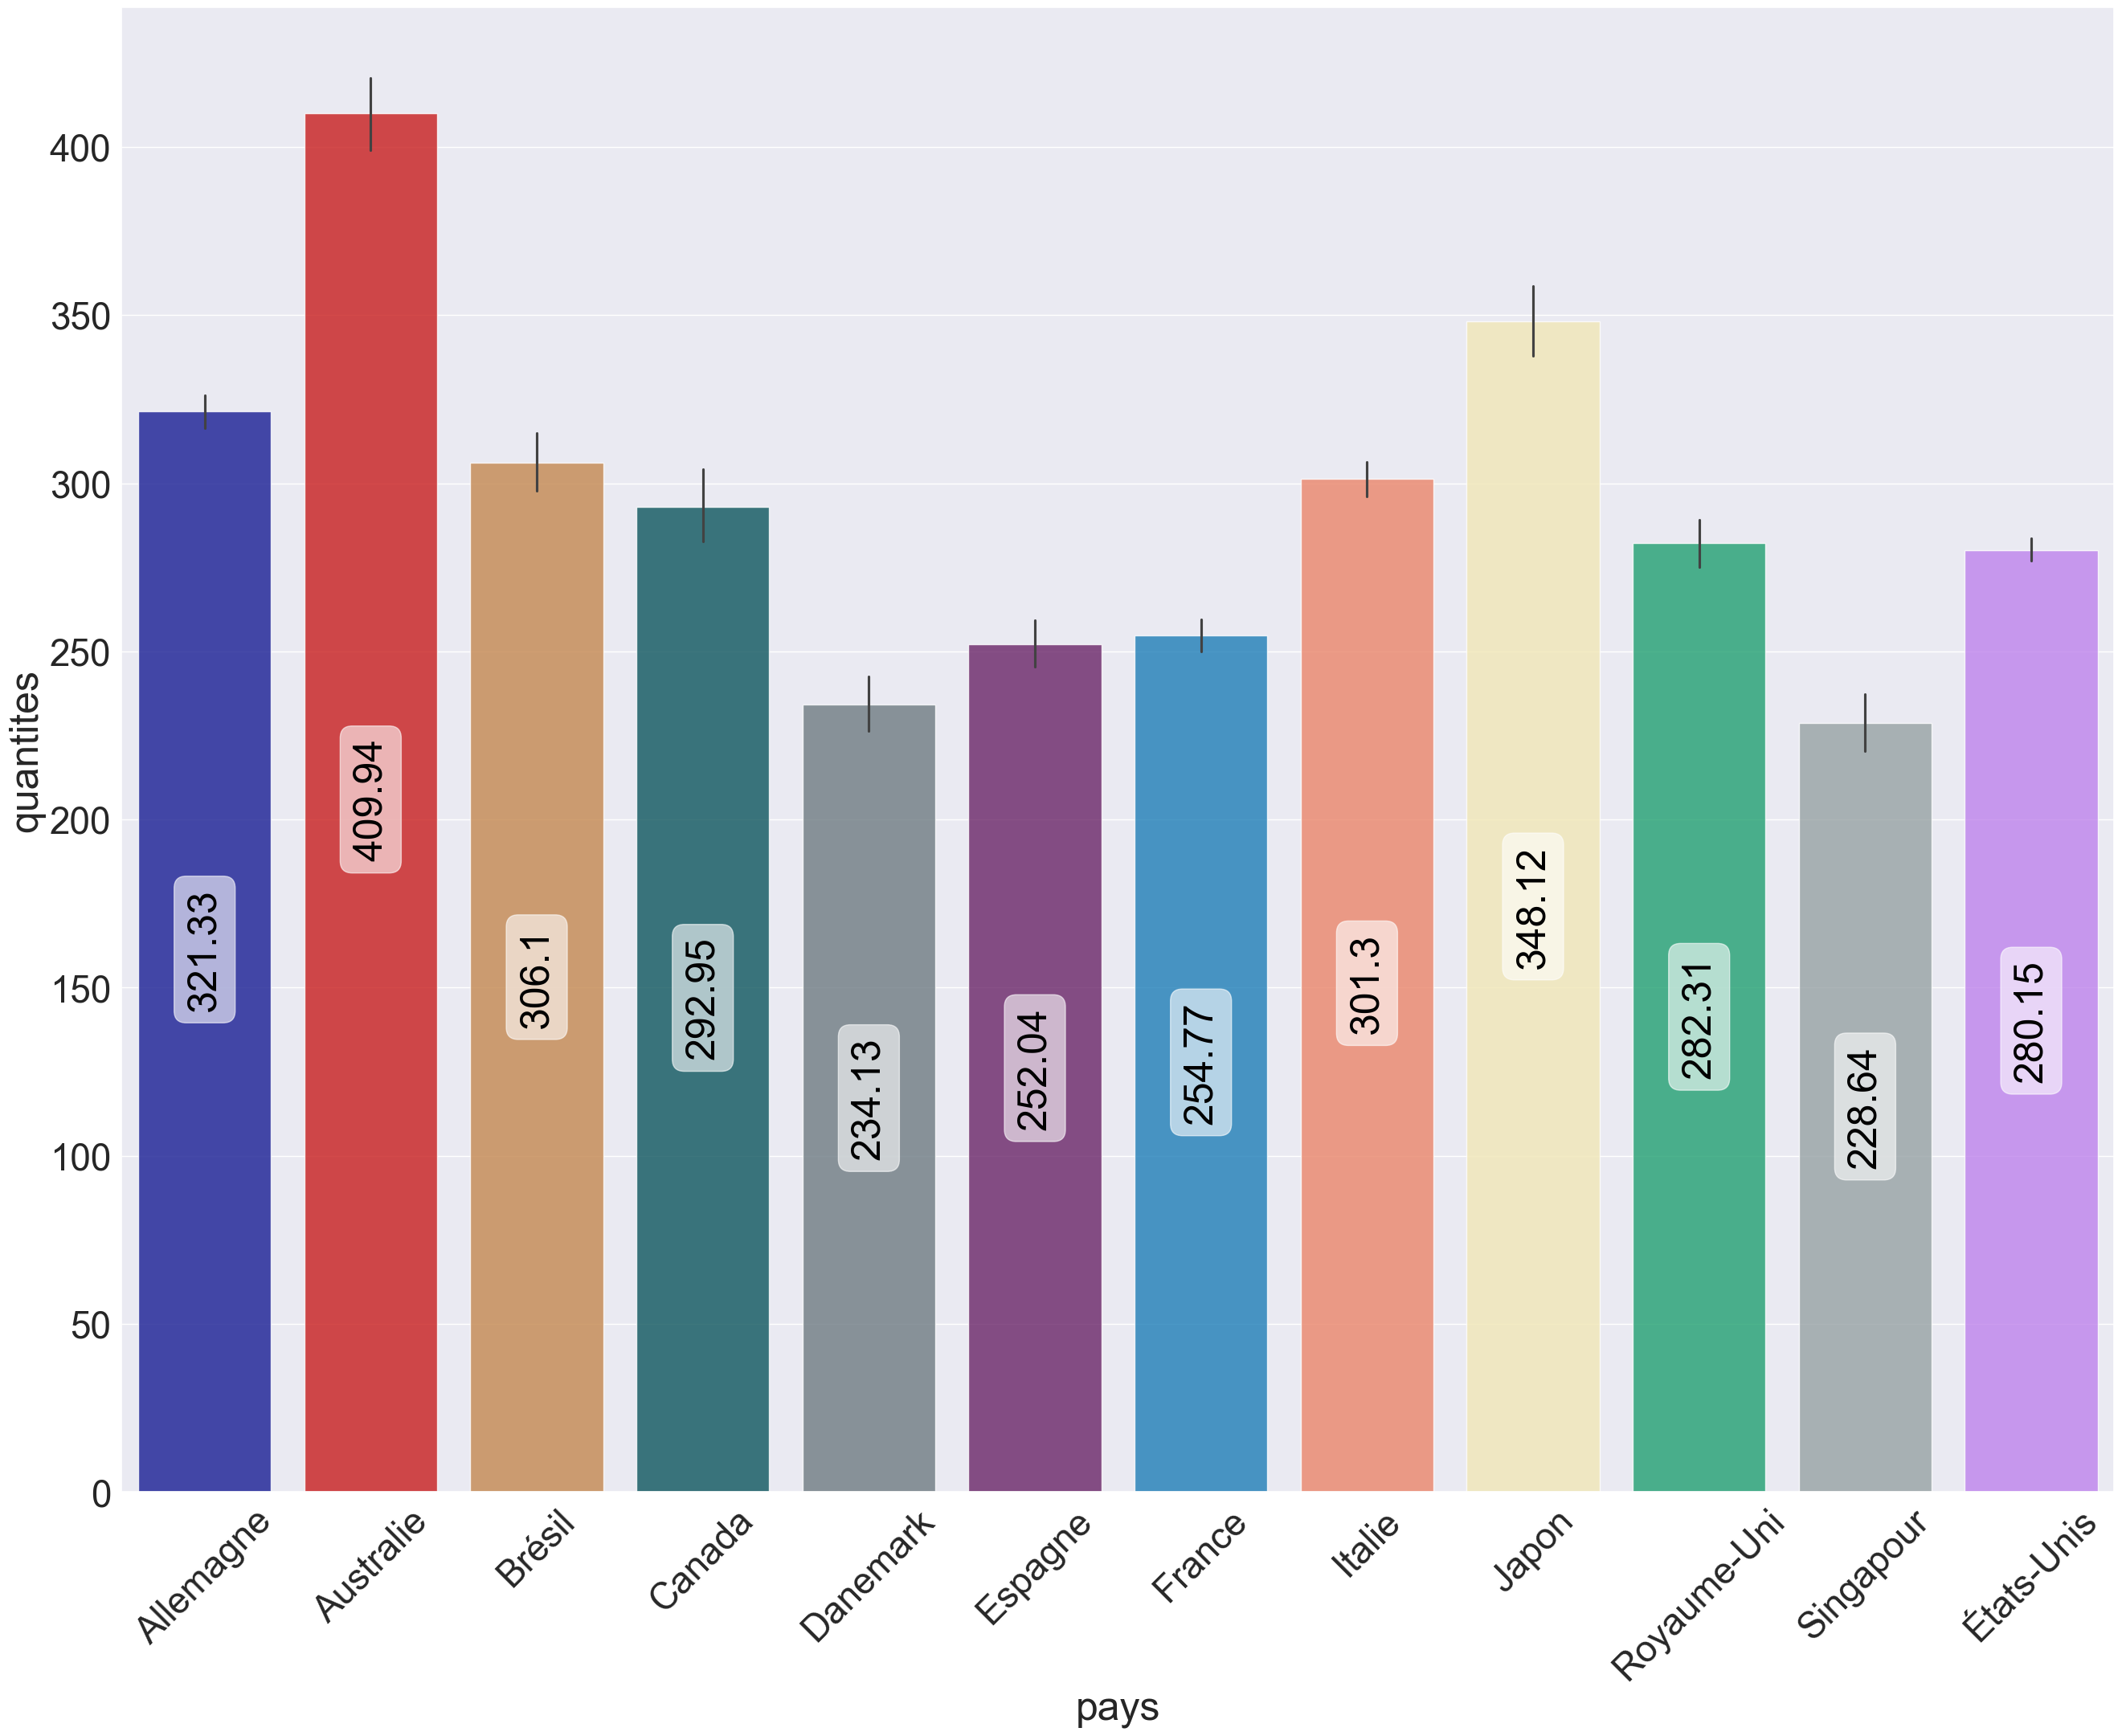

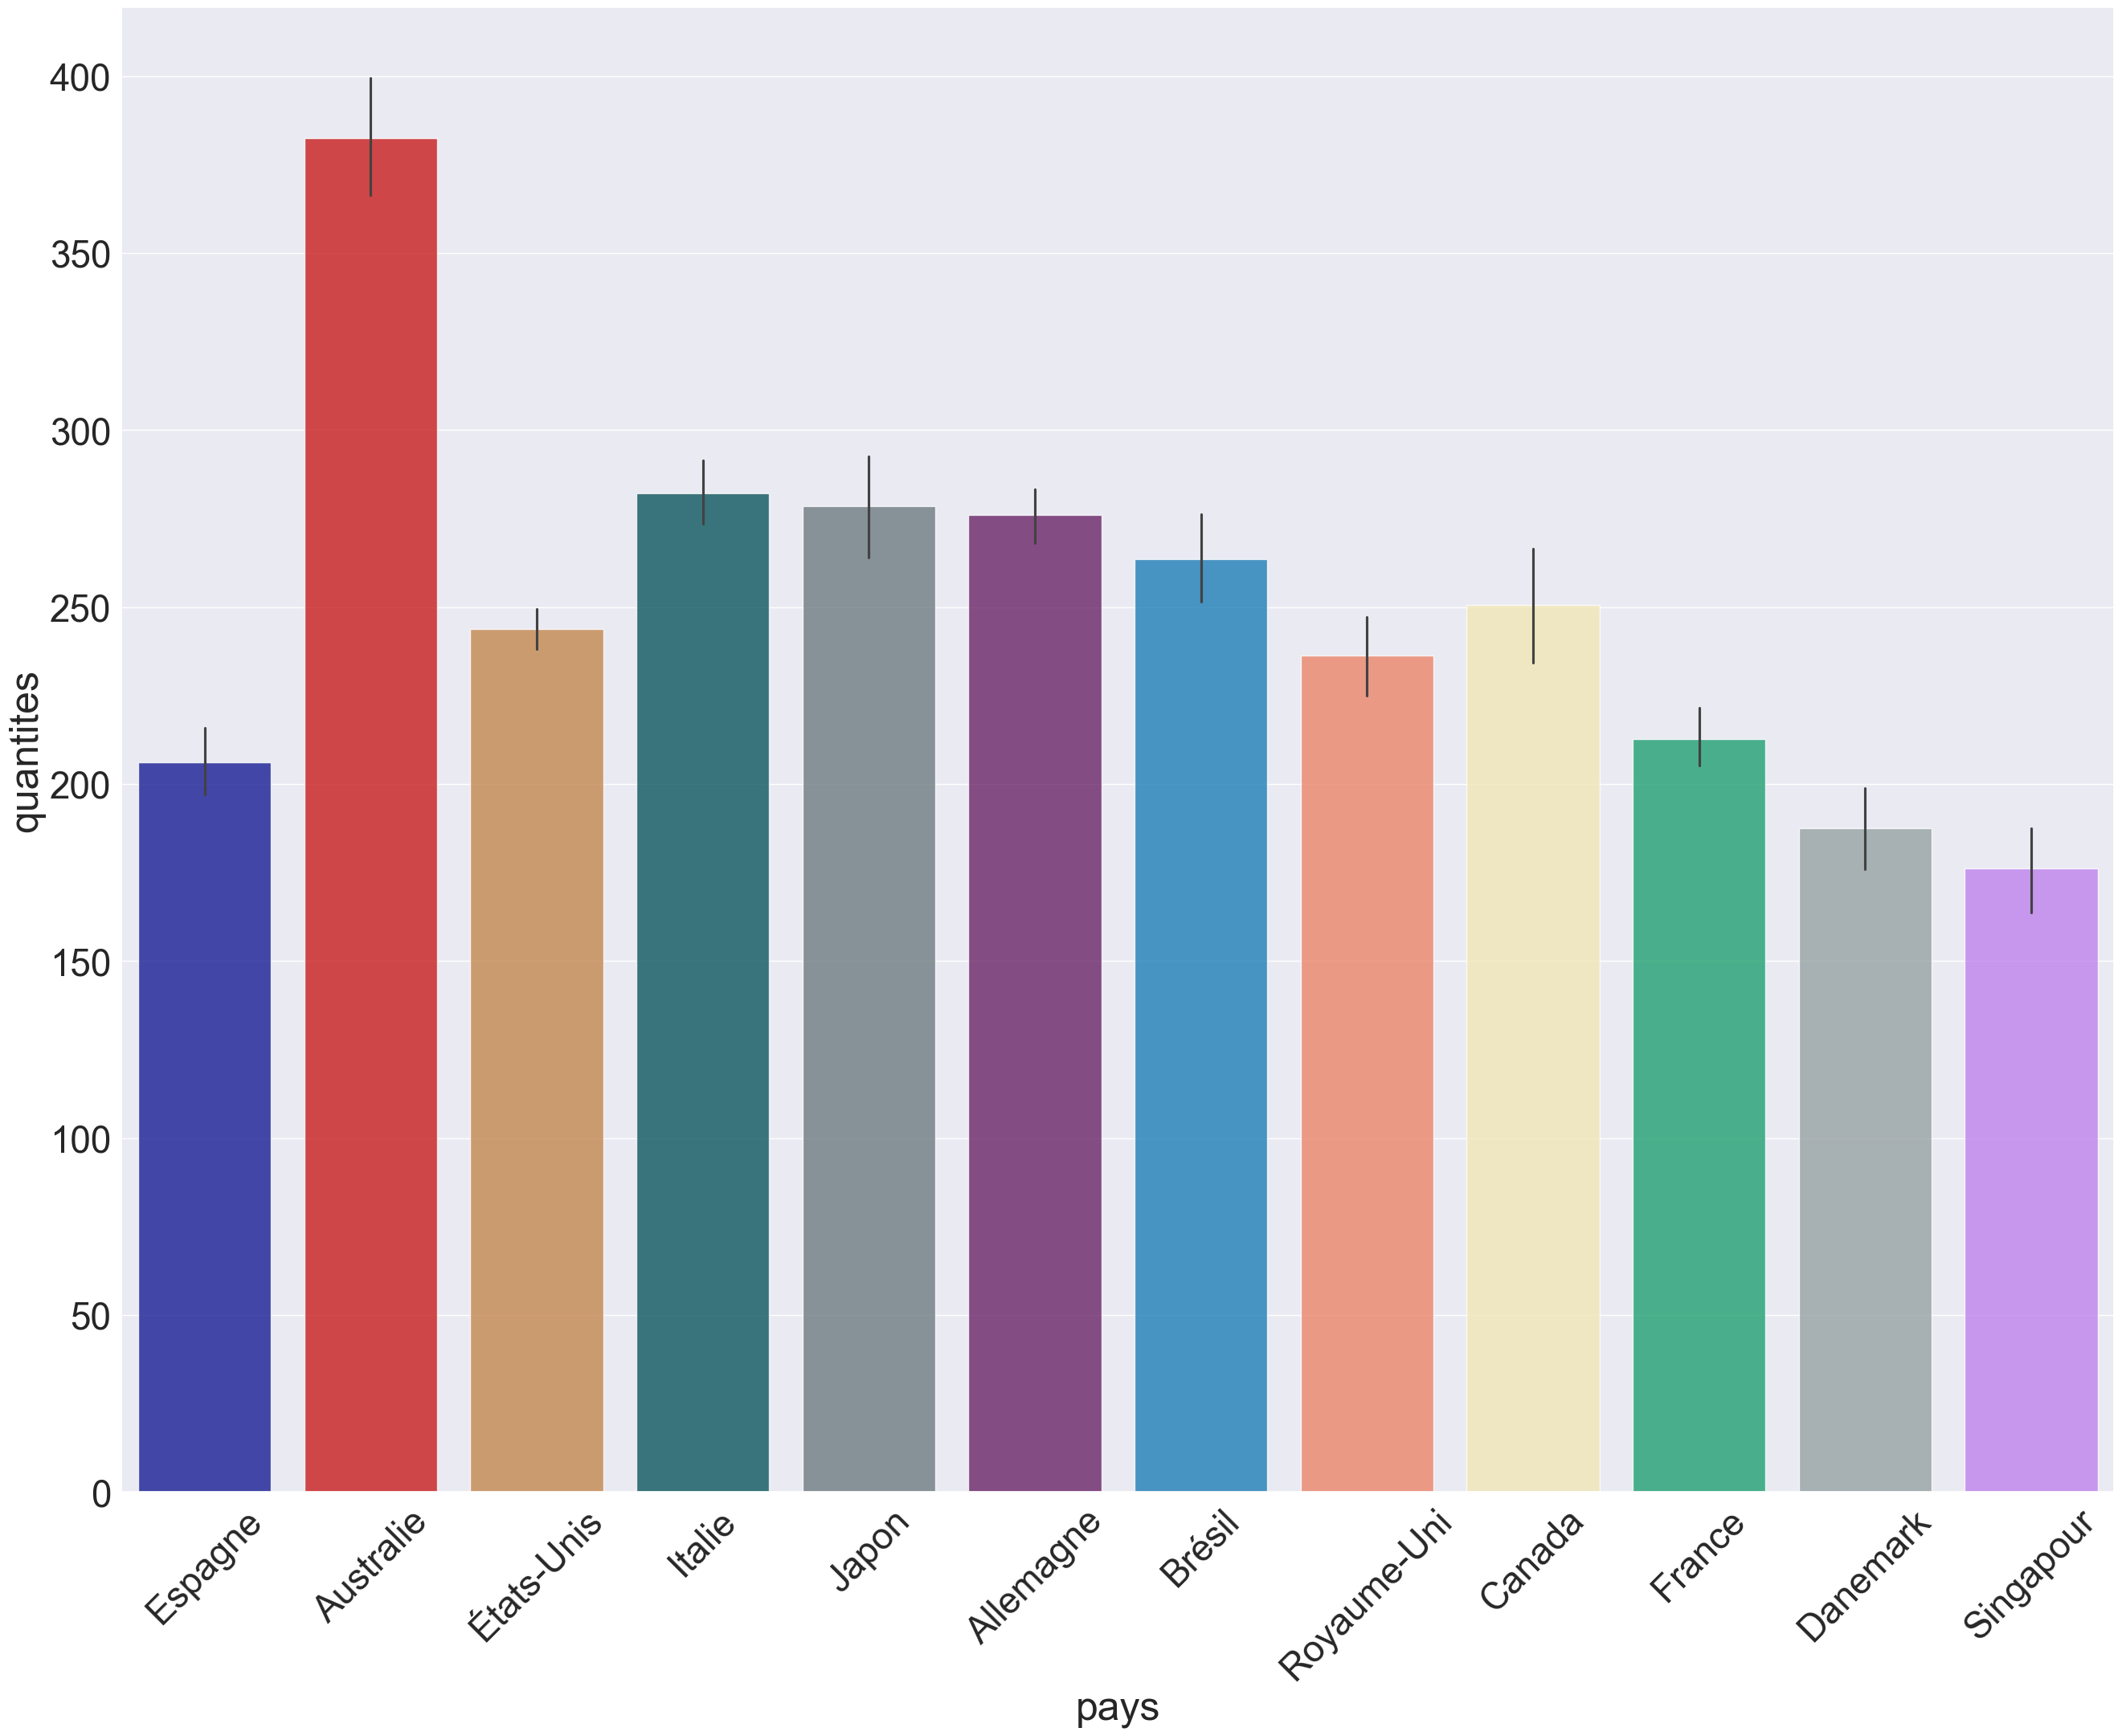

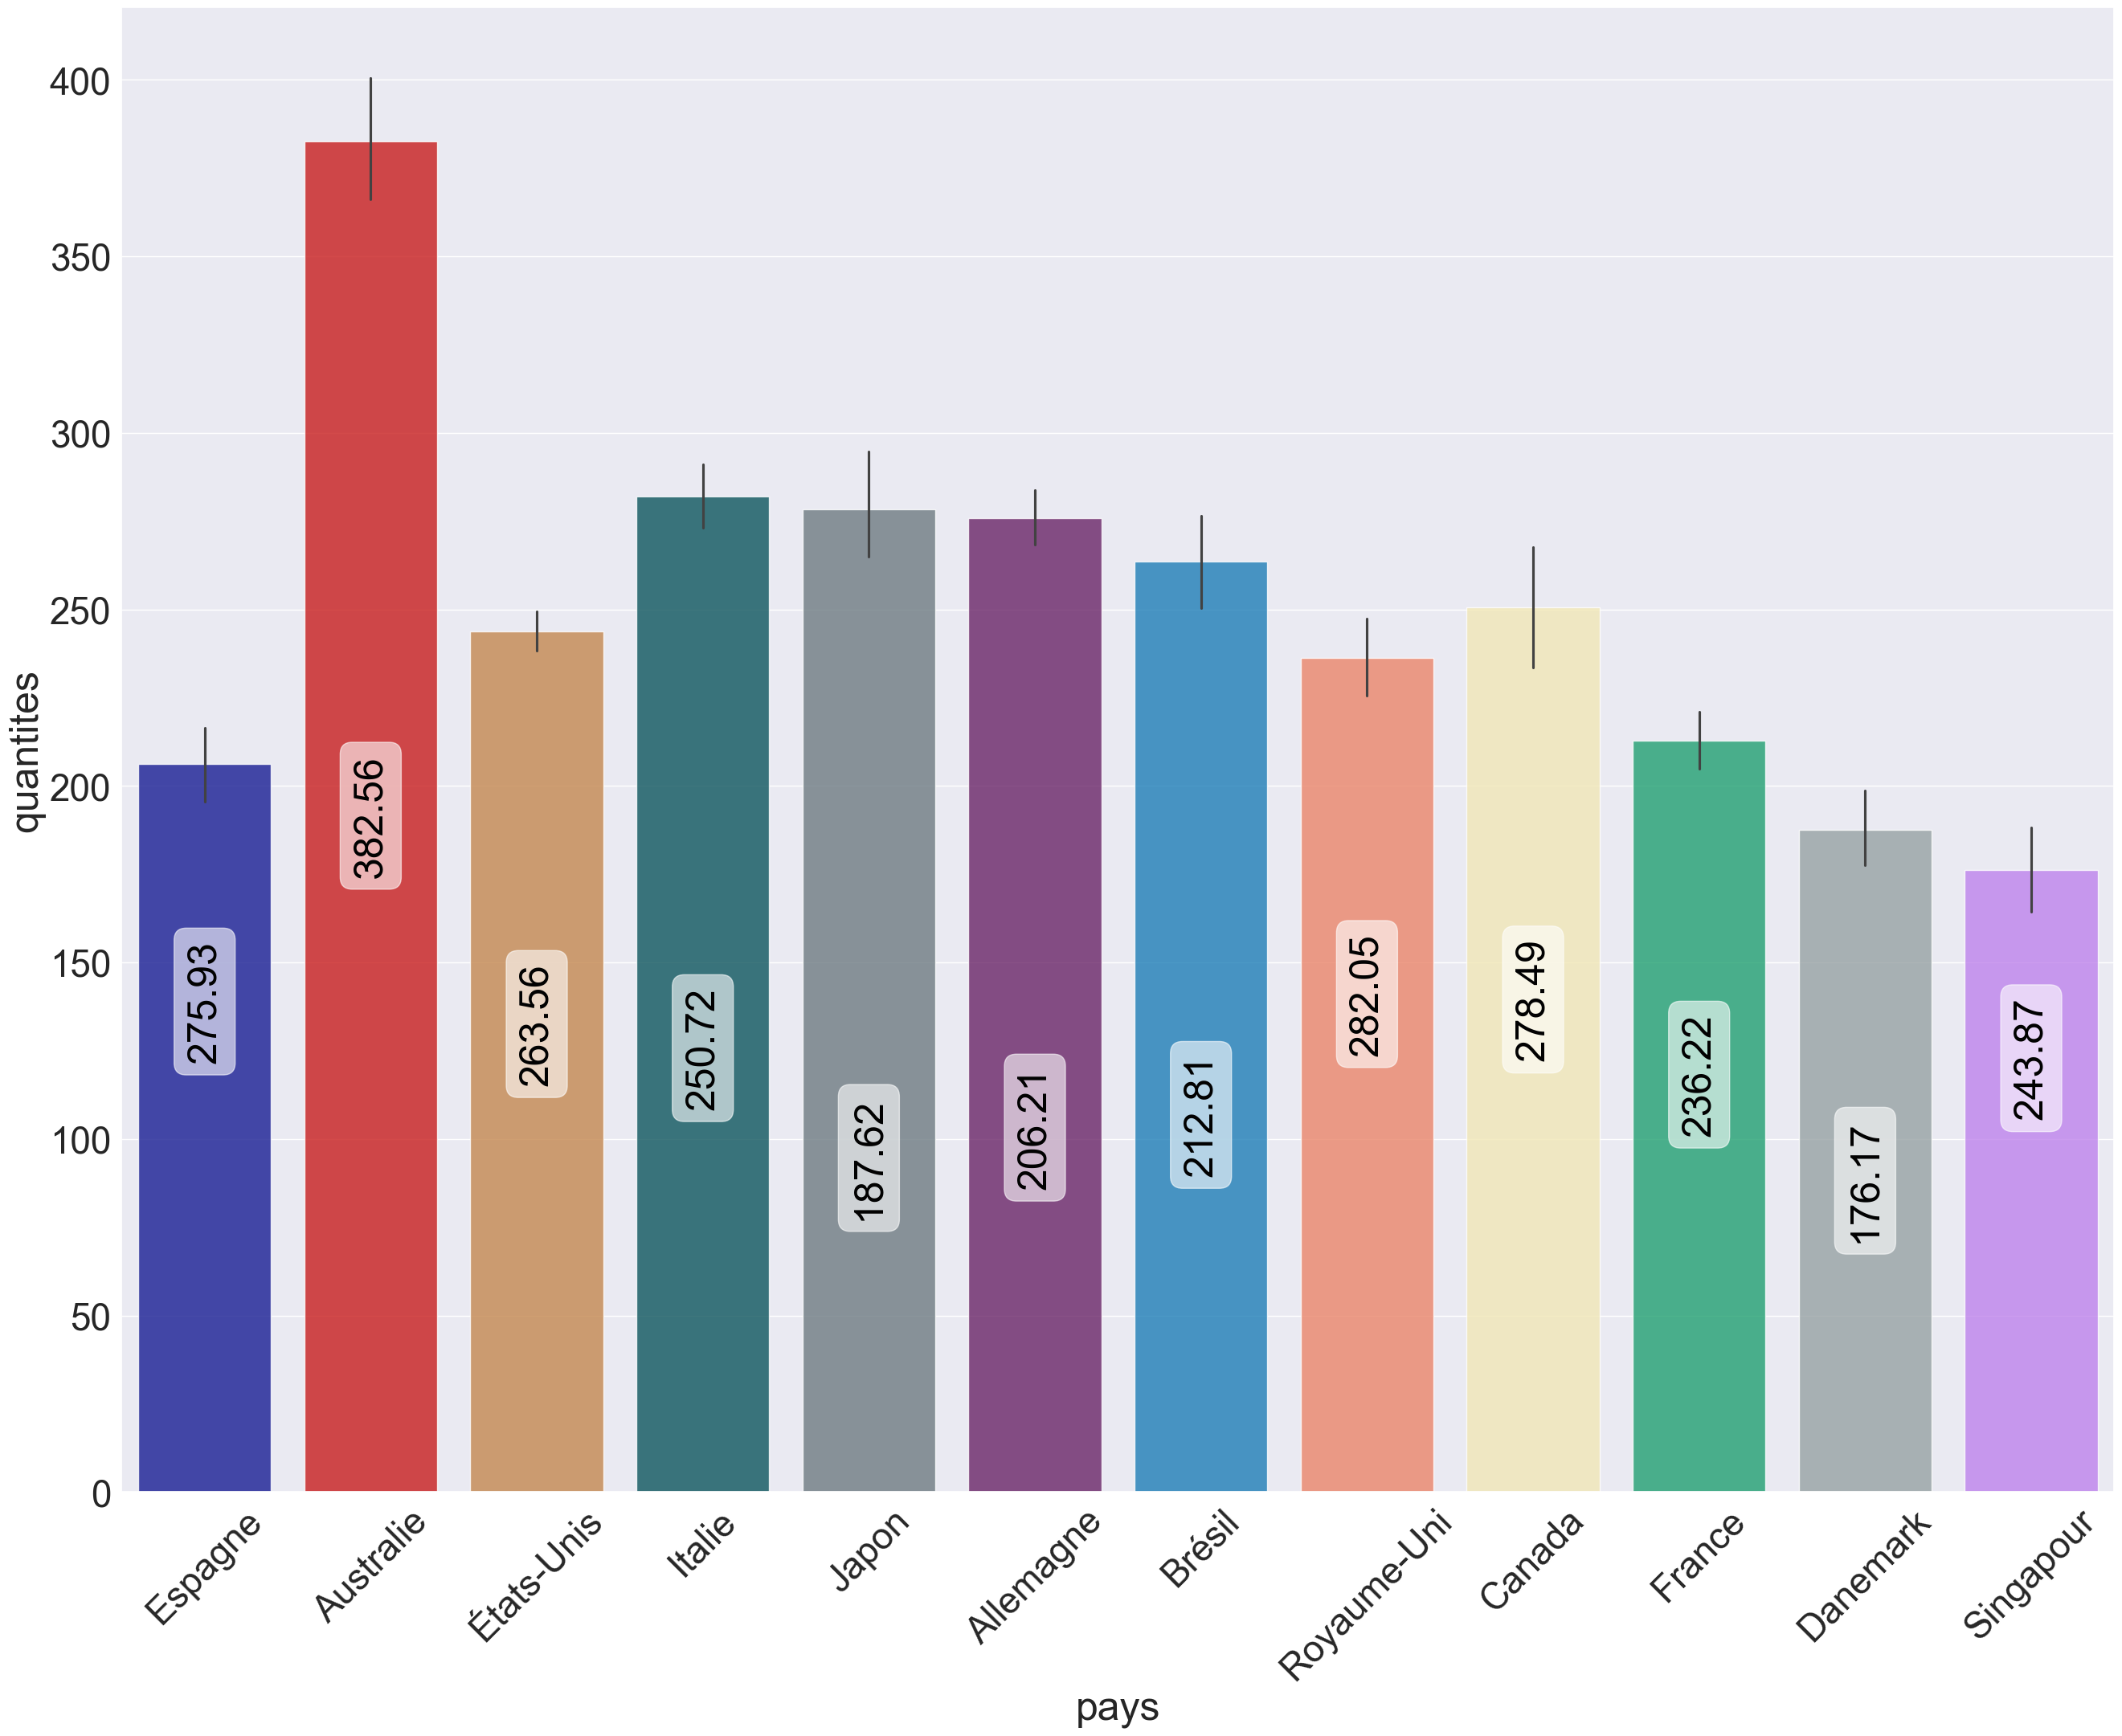

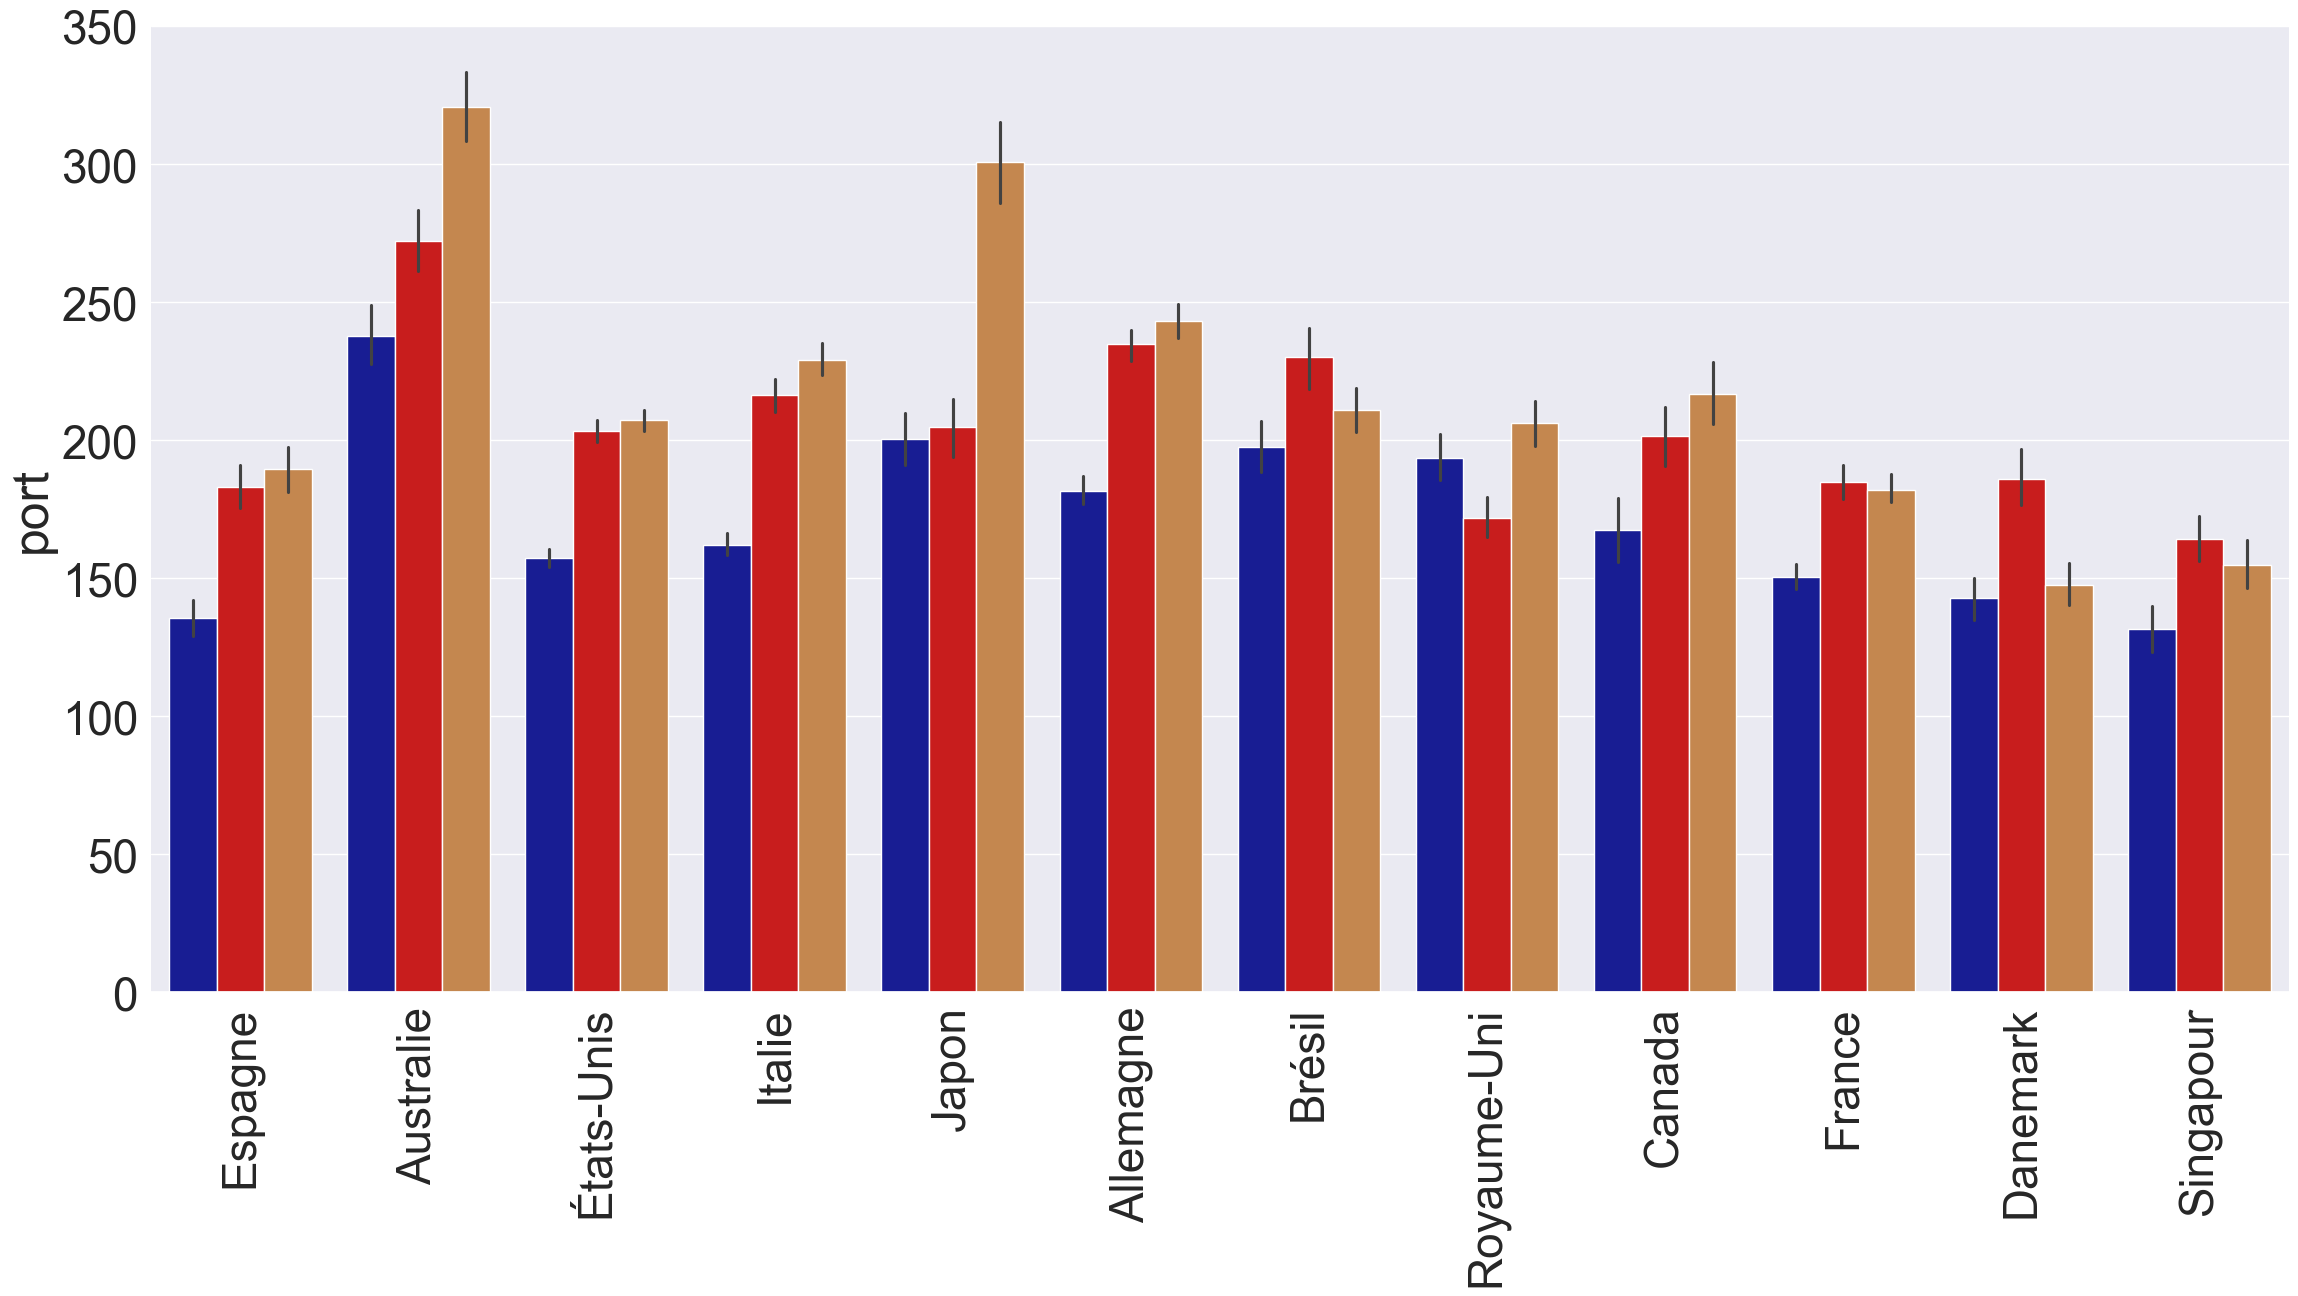

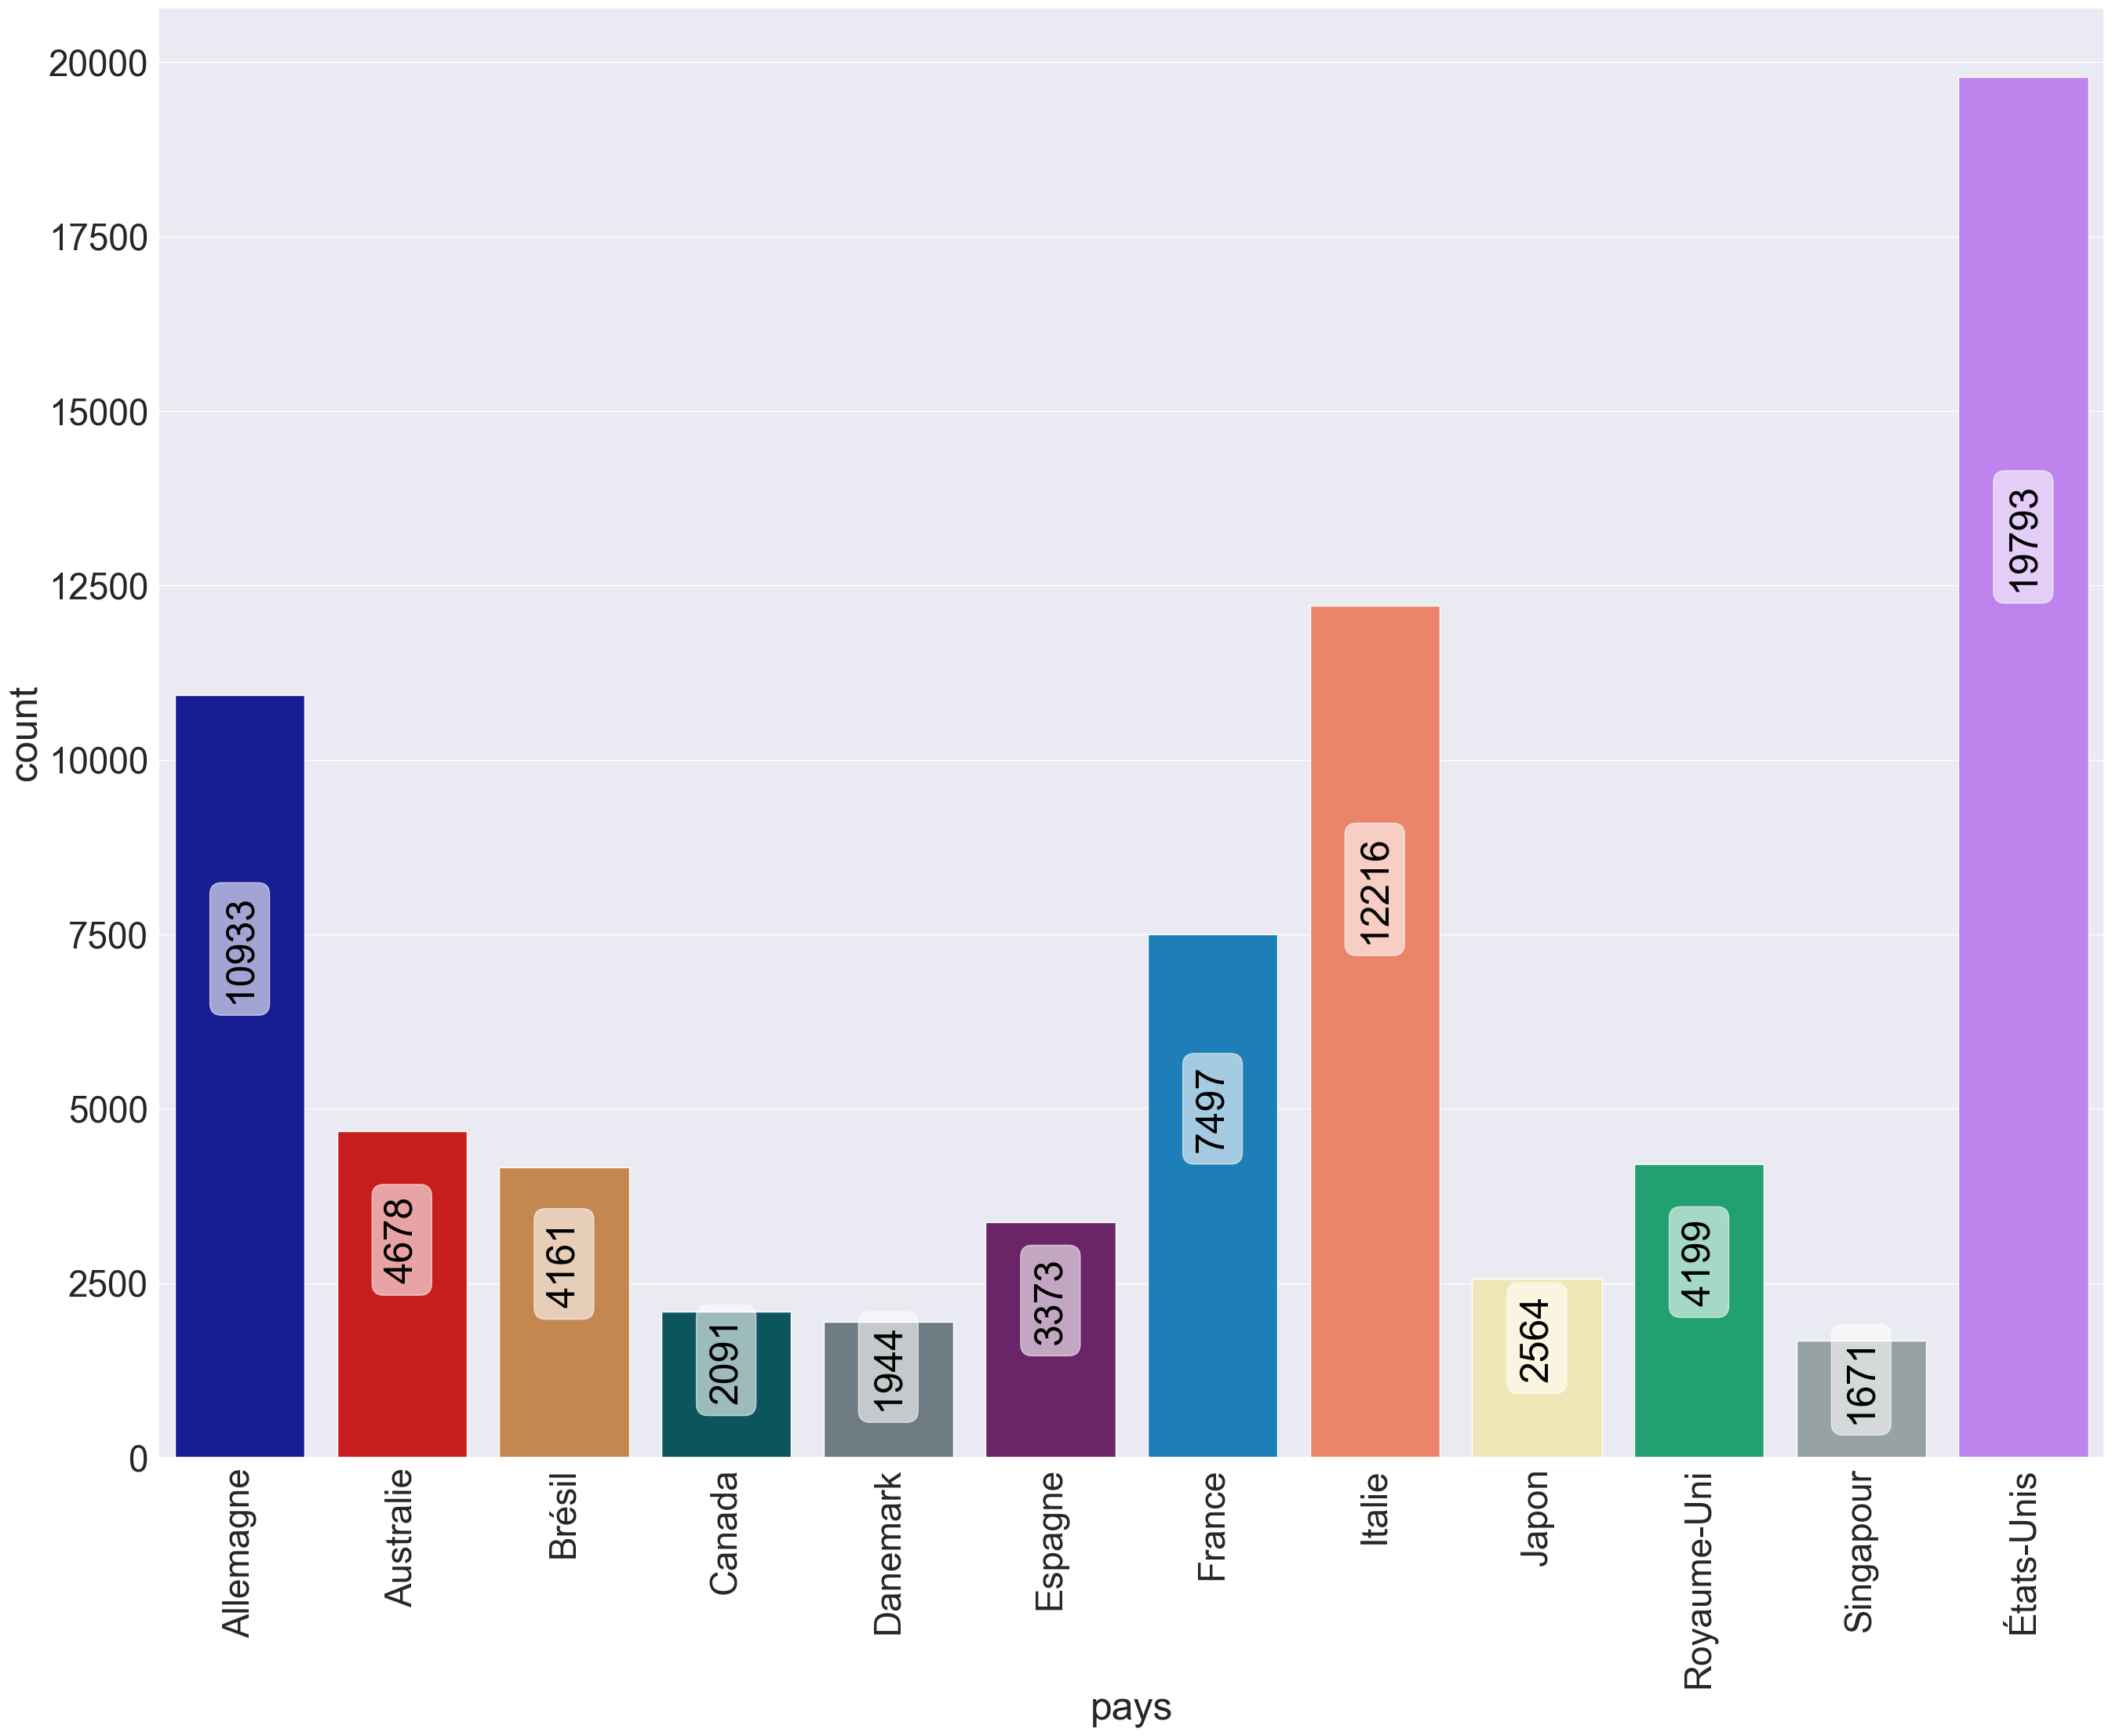

In [22]:
plt.figure(figsize=(32,24))
graph = sns.countplot(x='pays',
                      data=donnees, 
                      order=donnees.pays.sort_values().unique(),
                      palette=palette);

for i,nb in enumerate(donnees.groupby('pays').port.count().sort_index().values):
    graph.text(
                i ,
                nb-nb//3,
                nb,
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )
    
graph.set_xticklabels(donnees.pays.sort_values().unique(),rotation=90);
plt.show()

In [23]:
plt.figure(figsize=(32,24))
graph = sns.countplot(x='categorie',
                      data=donnees.sort_values('categorie'), 
                      palette=palette);
graph.set_xticklabels(donnees.sort_values('categorie').categorie.unique(),rotation=90);

In [24]:
plt.figure(figsize=(32,24))
graph = sns.countplot(x='categorie',
                      hue=donnees.sort_values('categorie')['annee'].astype(str),
                      data=donnees.sort_values('categorie'), 
                      palette=palette);

graph.set_xticklabels(donnees.sort_values('categorie').categorie.unique(),rotation=90);

# BoxPlot

In [25]:
plt.figure(figsize=(36,24))
sns.boxplot(x='quantites',y='categorie',data=donnees,hue='annee', palette=palette);

In [26]:
plt.figure(figsize=(36,24))
sns.boxplot(x='mois',y='ca', hue='annee', data=donnees, palette=palette);

# ScatterPlot

In [27]:
plt.figure(figsize=(36,24))
sns.scatterplot(x     = 'quantites',
                y     = 'port',
                hue   = 'categorie', 
                data  = donnees,
                s     = 200,
                palette= palette,
                );

In [28]:
d=donnees.groupby(['annee','pays']).agg({'port':['sum']}).reset_index()
d.columns=['annee','pays','port']
d.head()

,annee,pays,port
0,2017,Allemagne,851941.000000
1,2017,Australie,448475.312500
2,2017,Brésil,302781.187500
3,2017,Canada,152903.093750
4,2017,Danemark,123692.796875


In [29]:
plt.figure(figsize=(36,24))
sns.scatterplot(x     = 'pays',
                y     = 'port',
                hue   = 'annee', 
                data  = d,
                s     = 200,
                palette= palette,
                );

In [30]:
d.annee = d.annee.astype("category")

In [31]:
d.pays = d.pays.astype("category")

In [32]:
d.plot.scatter(x = 'pays',y = 'port',c='annee',figsize=(32,24), alpha=0.9, s=200, cmap=plt.cm.get_cmap('RdYlBu'))
plt.xticks(rotation = 90);

# LinePlot

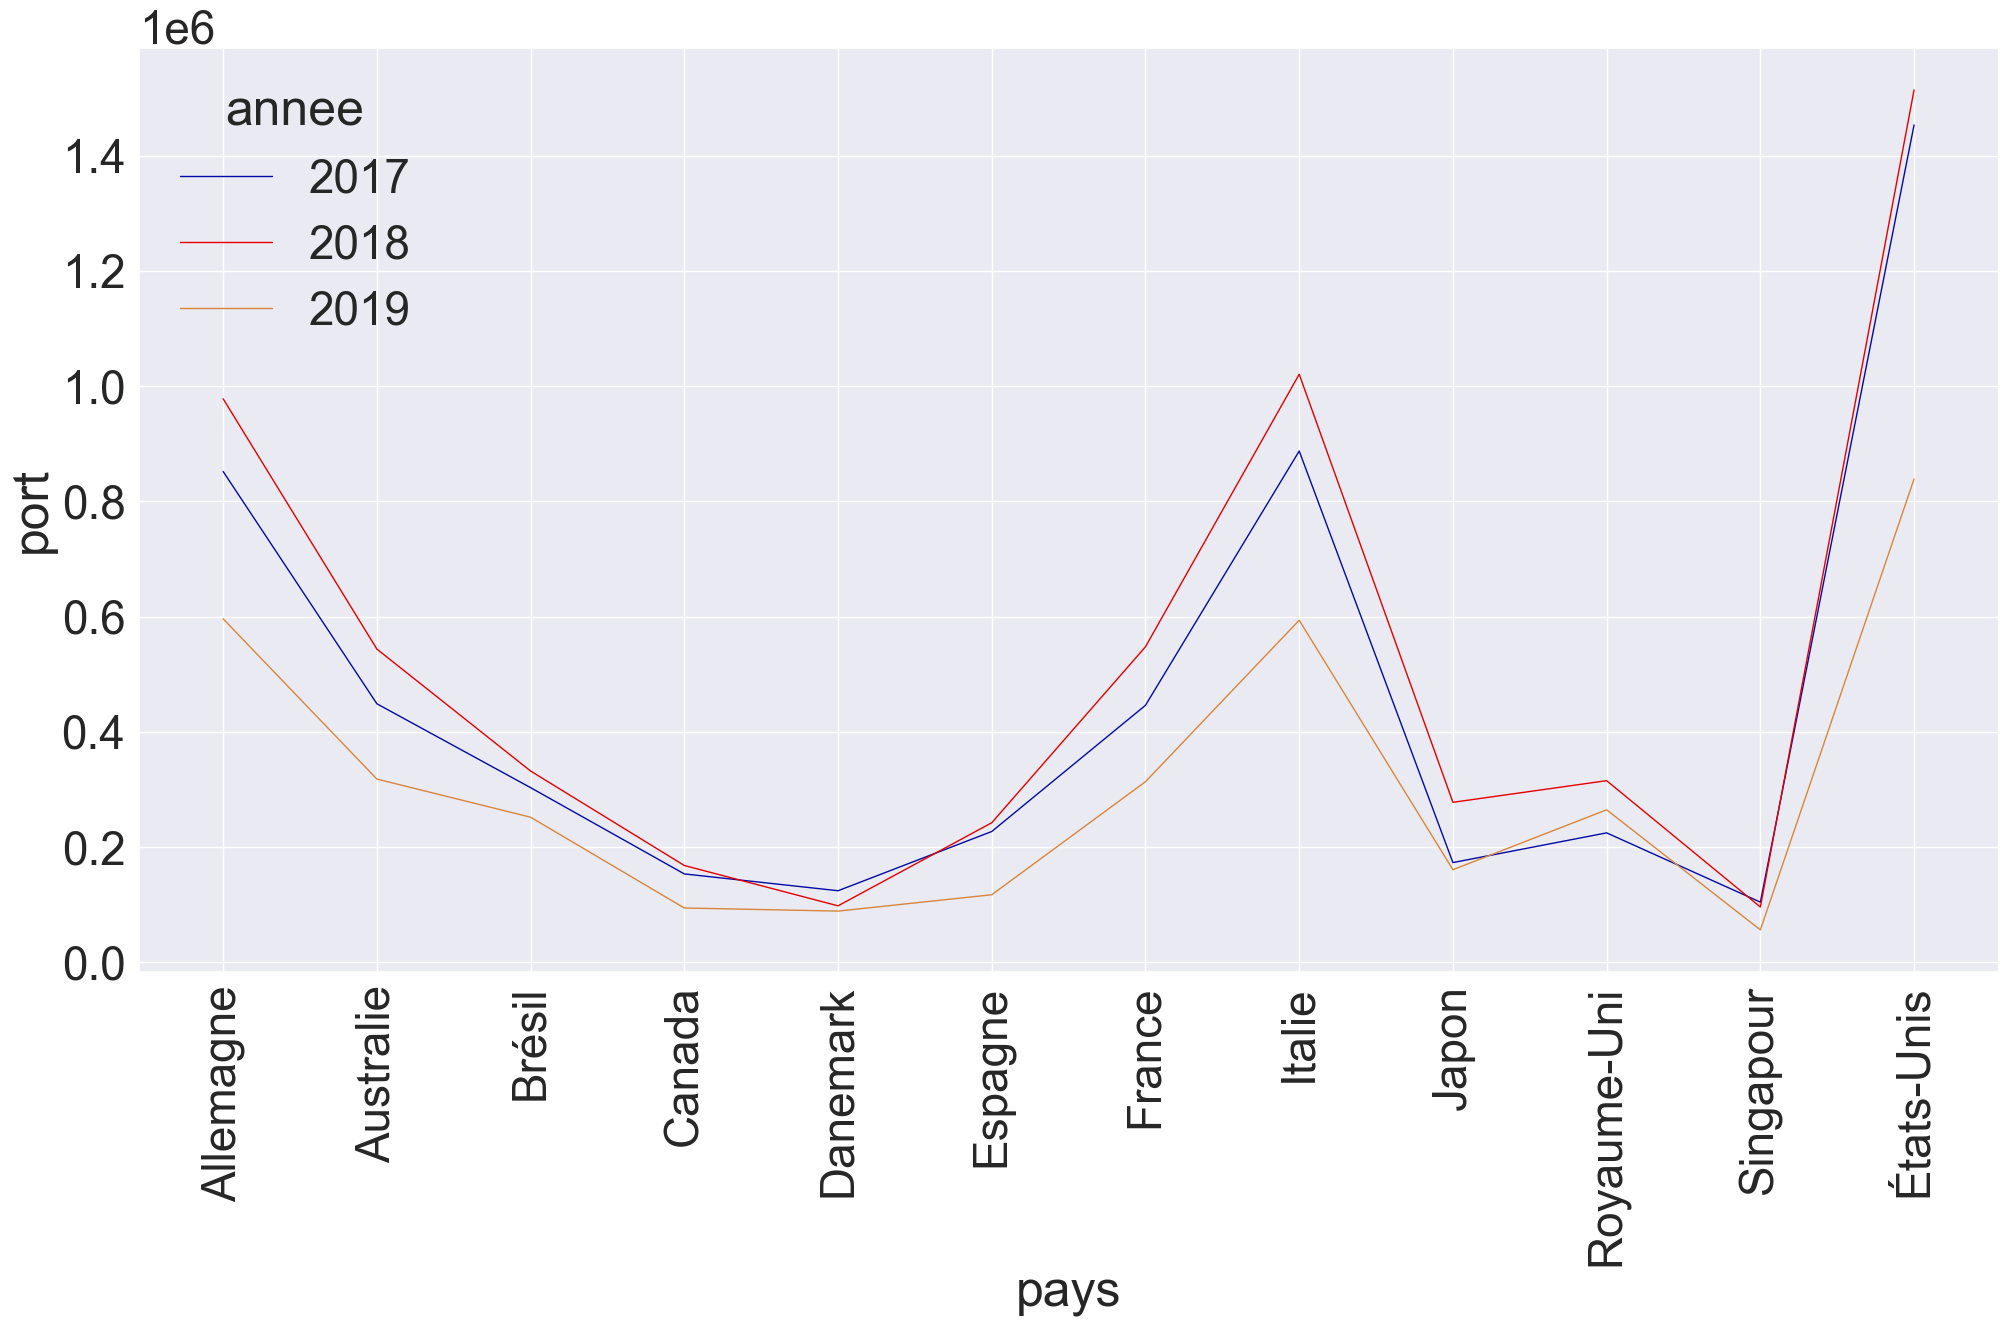

In [33]:
plt.figure(figsize=(24,12))

ax = sns.lineplot(x  ='pays',
                  y  ='port',
                  hue='annee',             
                  data=d, 
                  estimator=None, 
                  lw=1, 
                  ci=None, 
                  palette= palette);
ax.set_xticklabels(d.pays,rotation=90);
plt.gcf()

# LinePlot ScaterPlot

In [34]:
donnees.assign(
                 annee_mois = donnees.annee.astype('str')+donnees.mois.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'quantites':['mean']
                                 }).head(10)

,quantites
,mean
annee_mois,
201701,337.609103
201702,257.193293
201703,299.823326
201704,348.001732
201705,289.297365
201706,290.078934
201707,279.986605
201708,328.755508


In [35]:
calcul = donnees.assign(
                 annee_mois = donnees.annee.astype('str')+donnees.mois.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'quantites':['mean']
                                 })
calcul.columns = ['annee_mois','quantites']

plt.figure(figsize=(24,12))

graph = sns.lineplot( x         = "annee_mois", 
                      y         = "quantites", 
                      data      = calcul, 
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
#                       label     = nom,
                      color     = palette[0])
sns.scatterplot( x     = "annee_mois", 
                     y     = "quantites", 
                     data  = calcul, 
                             alpha =  0.8,   
                     s     = 200,
        #              ci    = None, 
                     color = palette[1],
                     ax    = graph,
                         );
                             
graph.set_xlabel('');
graph.set_ylabel('');    
graph.set_xticklabels(calcul.annee_mois,rotation=90);


ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

# PairPlot

In [36]:
sns.pairplot(data=donnees.drop(columns='mois'),hue='annee',size=10,palette=palette);

In [37]:
sns.pairplot(data=donnees.drop(columns=['annee','mois']),hue='pays',size=10,palette=palette);

In [38]:
sns.pairplot(data=donnees.drop(columns=['annee','mois']),hue='categorie',size=10,palette=palette);

# Pandas Visualisation

In [39]:
meteo = pd.read_parquet('../donnees/meteo.gzip', engine='pyarrow')

In [40]:
meteo.shape

(831725, 19)

In [41]:
meteo.columns

Index(['Nom', 'Latitude', 'Longitude', 'Altitude', 'Zone', 'DateHeure',
       'DirectionVent', 'VitesseVent', 'Temperature', 'Humidite', 'Visibilite',
       'Pression', 'Mois', 'Annee', 'AnneeMois', 'Semaine', 'MoisJour',
       'JourA', 'Precipitation'],
      dtype='object')

In [42]:
meteo[meteo.Nom == 'Strasbourg'].head()

,Nom,Latitude,Longitude,Altitude,Zone,DateHeure,DirectionVent,VitesseVent,Temperature,Humidite,Visibilite,Pression,Mois,Annee,AnneeMois,Semaine,MoisJour,JourA,Precipitation
257852,Strasbourg,48.5495,7.640333,150,NE,2017-01-01 00:00:00,180.0,2.3,-2.0,98.0,0.66,1010.7,1,2017,201701,52,101,1,0.0
257853,Strasbourg,48.5495,7.640333,150,NE,2017-01-01 03:00:00,170.0,2.5,-2.1,98.0,1.07,1008.7,1,2017,201701,52,101,1,0.0
257854,Strasbourg,48.5495,7.640333,150,NE,2017-01-01 06:00:00,250.0,1.5,-2.6,97.0,1.18,1007.3,1,2017,201701,52,101,1,0.0
257855,Strasbourg,48.5495,7.640333,150,NE,2017-01-01 09:00:00,230.0,2.0,-2.6,97.0,2.81,1006.3,1,2017,201701,52,101,1,0.0
257856,Strasbourg,48.5495,7.640333,150,NE,2017-01-01 12:00:00,220.0,2.3,-2.2,97.0,4.20,1004.0,1,2017,201701,52,101,1,0.0


In [43]:
meteo[meteo.Nom == 'Strasbourg'].plot.line(x='DateHeure',y='Temperature',figsize=(100,30),lw=1)

<Axes: xlabel='DateHeure'>

In [44]:
meteo[meteo.Nom == 'Strasbourg']\
     [meteo.AnneeMois == 201806].plot.line(x='DateHeure',y='Temperature',figsize=(18,14),lw=2)

<Axes: xlabel='DateHeure'>

In [45]:
meteo[meteo.Nom == 'Strasbourg'][meteo.AnneeMois == 201806].plot.scatter(x='Humidite',y='Pression',figsize=(20,20), alpha=0.9, s=200)

<Axes: xlabel='Humidite', ylabel='Pression'>

In [46]:
meteo[meteo.Nom == 'Strasbourg'][meteo.AnneeMois == 201806].plot.scatter(x='Humidite',y='Pression',c='Temperature',figsize=(20,20), alpha=0.9, s=200)

<Axes: xlabel='Humidite', ylabel='Pression'>

In [47]:
meteo[meteo.Nom == 'Strasbourg'][meteo.AnneeMois == 202306].plot.scatter(
    x='Humidite',y='Pression',c='Temperature',figsize=(20,20), alpha=0.9, 
    s=meteo[meteo.Nom == 'Strasbourg'][meteo.AnneeMois == 202306]['Temperature']*20, cmap='coolwarm')

<Axes: xlabel='Humidite', ylabel='Pression'>

In [48]:
meteo[meteo.Nom == 'Strasbourg'][meteo.AnneeMois == 202306].plot.scatter(
    x='Humidite',y='Pression',figsize=(20,20), alpha=0.4, s=meteo[meteo.Nom == 'Strasbourg'][meteo.AnneeMois == 202306]['Temperature']*20, color='navy');

In [49]:
donnees = pd.read_csv('../donnees/ozone.csv',sep=';')

In [50]:
donnees.head()

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,87,"15,6","18,5","18,4",4,4,8,"0,6946","-1,7101","-0,6946",84,Nord,Sec
1,602,82,17,"18,4","17,7",5,5,7,"-4,3301",-4,-3,87,Nord,Sec
2,603,92,"15,3","17,6","19,5",2,5,4,"2,9544","1,8794","0,5209",82,Est,Sec
3,604,114,"16,2","19,7","22,5",1,1,0,"0,9848","0,3473","-0,1736",92,Nord,Sec
4,605,94,"17,4","20,5","20,4",8,8,7,"-0,5","-2,9544","-4,3301",114,Ouest,Sec


In [51]:
donnees.columns

Index(['obs', 'maxO3', 'T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9',
       'Vx12', 'Vx15', 'maxO3v', 'vent', 'pluie'],
      dtype='object')

Les 13 variables observées sont :
>>  MaxO3 : Maximum de concentration d’ozone observé sur la journée en gr/m3<br>
>>  T9, T12, T15 : Température observée à 9, 12 et 15h<br>
>>  Ne9, Ne12, Ne15 : Nébulosité observée à 9, 12 et 15h<br>
>>  Vx9, Vx12, Vx15 : Composante E-O du vent à 9, 12 et 15h<br>
>>  MaxO3v : Teneur maximum en ozone observée la veille<br>
>>  vent : orientation du vent à 12h<br>
>>  pluie : occurrence ou non de précipitations<br>

In [52]:
for colonne in donnees.iloc[:,:-2].columns:
    if donnees[colonne].dtype == 'object' : 
        donnees[colonne] = donnees[colonne].apply(lambda x : str(x).replace(',','.')).astype('float')

In [53]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   obs     112 non-null    int64  
 1   maxO3   112 non-null    int64  
 2   T9      112 non-null    float64
 3   T12     112 non-null    float64
 4   T15     112 non-null    float64
 5   Ne9     112 non-null    int64  
 6   Ne12    112 non-null    int64  
 7   Ne15    112 non-null    int64  
 8   Vx9     112 non-null    float64
 9   Vx12    112 non-null    float64
 10  Vx15    112 non-null    float64
 11  maxO3v  112 non-null    int64  
 12  vent    112 non-null    object 
 13  pluie   112 non-null    object 
dtypes: float64(6), int64(6), object(2)
memory usage: 12.4+ KB


In [54]:
plt.figure(figsize=(34,34))
sns.set(font_scale=2.4)
plt.title('Correlation Pearson des variables', y=1.05, size=18)
sns.heatmap(donnees.iloc[:,:-2].corr(),linewidths=0.3,vmax=1.0, fmt= '.2f', 
            square=True, cmap='coolwarm', linecolor='white', annot=True)
sns.set(font_scale=2)